- https://automating-gis-processes.github.io/2016/Installing_Anacondas_GIS.html
- http://pdf.th7.cn/down/files/1603/Learning%20Geospatial%20Analysis%20with%20Python,%202nd%20Edition.pdf

conda install numpy pandas scipy gdal fiona shapely pyproj psycopg2 matplotlib bokeh holoviews sphinx
conda install -y -c conda-forge geopandas
conda install -y -c conda-forge basemap=1.0.8.dev0 --no-deps
conda install -y -c activisiongamescience tweepy=3.5.0
conda install -y -c anaconda rasterio=0.36.0
conda install -y -c scitools/label/dev -c conda-forge iris cartopy
conda install -y xarray
conda install -y -c ioam geoviews=1.1.0
conda install -y -c ioos mplleaflet=0.0.5
conda install -y -c anaconda flake8=2.5.1
conda install -y -c conda-forge seawater
conda install -y -c conda-forge gpxpy=1.1.1
conda install -y -c conda-forge branca=0.1.2
pip install https://github.com/python-visualization/folium/archive/master.zip

## Geometric Objects - Spatial Data Model

<img src="http://www.helsinki.fi/science/accessibility/maintenance/Kuvia/SpatialDataModel.PNG">

- use shapely that offers points, lines, and polygons which are basic elements of spatial data.
- calculate areas, length, bounds of input geometries
- union, difference, distance and intersects, touches, crosses, within 

* point :
* linestring : 
* polygon : 

In [1]:
from shapely.geometry import Point, LineString, Polygon

point1 = Point(2.2, 4.2)

point2 = Point(7.2, -25.1)

point3 = Point(9.26, -2.456)

point3D = Point(9.26, -2.246, 0.57)

point_type = type(point1)

In [3]:
point_coords = point1.coords

type(point_coords)

shapely.coords.CoordinateSequence

In [4]:
xy = point_coords.xy

x = point1.x
y = point1.y

In [5]:
print(xy)
print(x)
print(y)

(array('d', [2.2]), array('d', [4.2]))
2.2
4.2


- Okey, so we can see that the our xy variable contains a tuple where x and y are stored inside of a numpy arrays. However, our x and y variables are plain decimal numbers.
> - It is also possible to calculate the distance between points which can be useful in many applications
> - the returned distance is based on the projection of the points (degrees in WGS84, meters in UTM)

In [6]:
point_dist = point1.distance(point2)
print("distance between the points is {0:.2f} decimal degrees".format(point_dist))

distance between the points is 29.72 decimal degrees


### LineString

In [7]:
line = LineString([point1, point2, point3])

line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

print(line)
print(line2)
type(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


shapely.geometry.linestring.LineString

- LineString -object has many useful built-in attributes and functionalities. It is for instance possible to extract the coordinates or the length of a LineString (line), calculate the centroid of the line, create points along the line at specific distance, calculate the closest distance from a line to specified Point and simplify the geometry. See full list of functionalities from Shapely documentation. Here, we go through a few of them.

In [8]:
lxy = line.xy

print(lxy) # maybe a line in 3-dimnesion(3 rank)

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))


In [9]:
line_x = lxy[0]

line_y = line.xy[1]
print(line_x)
print(line_y)

array('d', [2.2, 7.2, 9.26])
array('d', [4.2, -25.1, -2.456])


* We can get specific attributes such as lenght of the line and center of the line (centroid) straight from the LineString object itself

In [11]:
l_length = line.length

l_centroid = line.centroid

centroid_type = type(l_centroid)

print("Length : {0:.2f}".format(l_length))
print("Centroid : {}".format(l_centroid))
print("Type of Centroid : {}".format(centroid_type))

Length : 52.46
Centroid : POINT (6.229961354035622 -11.89241115757239)
Type of Centroid : <class 'shapely.geometry.point.Point'>


### Polygon

In [13]:
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

poly2 = Polygon([p.x, p.y] for p in [point1, point2, point3])

poly_type = poly.geom_type
poly_type2 = type(poly)

print(poly)
print(poly2)
print("Geometry type as text :", poly_type)
print("Geometry how Python shows it : ", poly_type2)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
Geometry type as text : Polygon
Geometry how Python shows it :  <class 'shapely.geometry.polygon.Polygon'>


Help on Polygon in module shapely.geometry.polygon object:
class Polygon(shapely.geometry.base.BaseGeometry)
 |  A two-dimensional figure bounded by a linear ring
 |
 |  A polygon has a non-zero area. It may have one or more negative-space
 |  "holes" which are also bounded by linear rings. If any rings cross each
 |  other, the feature is invalid and operations on it may fail.
 |
 |  Attributes
 |  ----------
 |  exterior : LinearRing
 |      The ring which bounds the positive space of the polygon.
 |  interiors : sequence
 |      A sequence of rings which bound all existing holes.

In [15]:
world_exterior = [(-180, 90), (-180, -90), (180, 90), (180, 90)]

hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

world = Polygon(shell=world_exterior)

world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

In [16]:
print(world)
print(world_has_a_hole)
type(world_has_a_hole)

POLYGON ((-180 90, -180 -90, 180 90, 180 90, -180 90))
POLYGON ((-180 90, -180 -90, 180 90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


shapely.geometry.polygon.Polygon

#### Polygon attributes and functions

In [19]:
world_centroid = world.centroid

world_area = world.area

world_box = world.bounds

world_ext = world.exterior

world_ext_length = world_ext.length

In [20]:
print("Poly centroid : ", world_centroid)
print("Poly Area : ", world_area)
print("Poly Bounding Box : ", world_box)
print("Poly Exterior : ", world_ext)
print("Poly Exterior Length : ", world_ext_length)

Poly centroid :  POINT (-60 30)
Poly Area :  32400.0
Poly Bounding Box :  (-180.0, -90.0, 180.0, 90.0)
Poly Exterior :  LINEARRING (-180 90, -180 -90, 180 90, 180 90, -180 90)
Poly Exterior Length :  942.4922359499622


### Multi points, lines, polygons collection

# Lesson 2

- Geopandas
- https://github.com/mapbox/rasterio

In [22]:
import geopandas as gpd

In [25]:
fp = "./shapely/Data/DAMSELFISH_distributions.shp"

In [26]:
data = gpd.read_file(fp)

In [27]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [28]:
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,,,,,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,POLYGON ((-115.6437454219999 29.71392059300007...
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,,,,,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.589950704 21.89339825500002, -1..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,,,,,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.159618439 19.01535626700007, -1..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,,,,,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-80.86500229899997 -0.77894492099994...
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,,,,,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,POLYGON ((-67.33922225599997 -55.6761029239999...


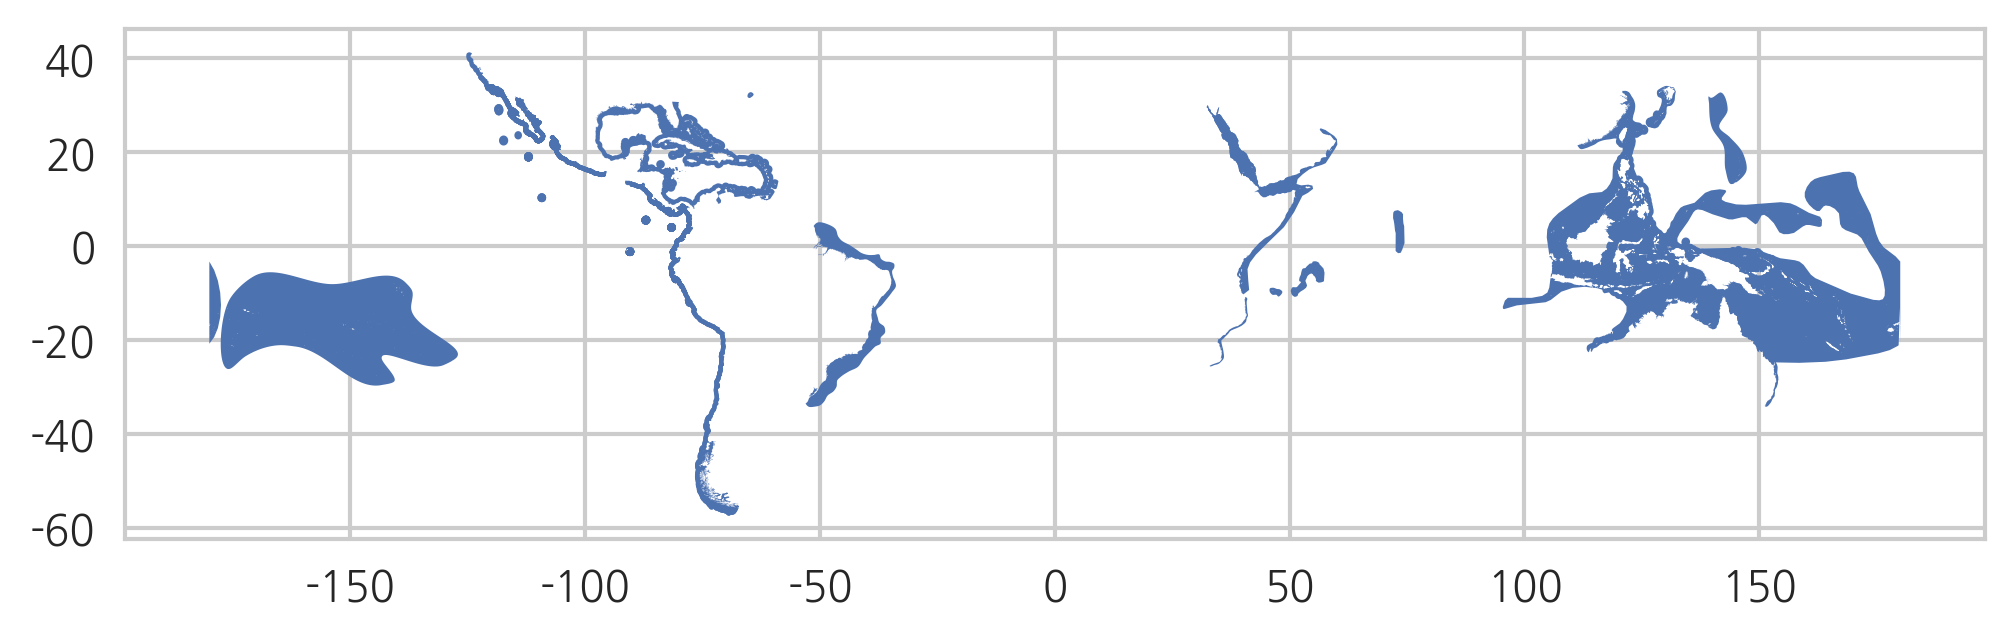

In [29]:
data.plot()

### Coordinates reference system(CRS)

In [30]:
data.crs

{'init': 'epsg:4326'}

- http://www.epsg.org/
- http://spatialreference.org/ref/epsg/
- Okey, so from this we can see that the data is something called epsg:4326. The EPSG number (“European Petroleum Survey Group”) is a code that tells about the coordinate system of the dataset. “EPSG Geodetic Parameter Dataset is a collection of definitions of coordinate reference systems and coordinate transformations which may be global, regional, national or local in application”. EPSG-number 4326 that we have here belongs to the WGS84 coordinate system (i.e. coordinates are in decimal degrees (lat, lon)). You can check easily different epsg-codes from this website.

### Writing a Shapefile

In [31]:
out = "./shapely/Processed_data/DAMSELFISH_distributions_SELECTION.shp"

In [32]:
selection = data[0:50]
# selection.to_file(out)

### Geometries in Geopandas 

In [33]:
data['geometry'].head()

0    POLYGON ((-115.6437454219999 29.71392059300007...
1    POLYGON ((-105.589950704 21.89339825500002, -1...
2    POLYGON ((-111.159618439 19.01535626700007, -1...
3    POLYGON ((-80.86500229899997 -0.77894492099994...
4    POLYGON ((-67.33922225599997 -55.6761029239999...
Name: geometry, dtype: object

* Since spatial data is stored as Shapely objects, it is possible to use all of the functionalities of Shapely module that we practiced earlier.

In [36]:
selection_1 = data[0:5]

In [37]:
for index , row in selection_1.iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is : {1:.3f}".format(index, poly_area))

Polygon area at index 0 is : 19.396
Polygon area at index 1 is : 6.146
Polygon area at index 2 is : 2.697
Polygon area at index 3 is : 87.461
Polygon area at index 4 is : 0.001


In [40]:
data['area'] = None
for index , row in data.iterrows():
    poly_area = row['geometry'].area
    data.loc[index, 'area'] = row['geometry'].area

In [41]:
data['area']

0          19.3963
1           6.1459
2          2.69721
3          87.4606
4       0.00091837
5        2.989e-15
6          2.73216
7          2.65466
8          2.38157
9         0.536302
10        0.339619
11        0.011656
12     0.000191275
13     4.88518e-07
14         27.3477
15         10.4793
16         2.69721
17         10.7492
18         87.2461
19      0.00091837
20       2.989e-15
21         113.242
22         18.4381
23         16.4377
24     5.28753e-05
25         4.81074
26         2.69721
27         38.6712
28         37.4457
29         16.9395
          ...     
201        5.34202
202         4.2138
203         3.8494
204        39.1339
205         25.887
206        16.2492
207        2.73216
208        2.69721
209        2.65466
210        2.38157
211       0.011656
212    4.88518e-07
213        34.8358
214        17.0019
215        5.98136
216        2.73216
217        2.65959
218        2.65466
219        2.38157
220       0.011656
221    4.88518e-07
222        3

In [43]:
max_area = data['area'].max()
min_area = data['area'].min()

print("Max area: %s\nMean area: %s" % (round(max_area, 2), round(min_area, 2)))

Max area: 1493.2
Mean area: 0.0


### Creating geometries into a GeoDataFrame

In [44]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona

In [45]:
newdata = gpd.GeoDataFrame()

In [46]:
newdata

""


In [47]:
newdata['geometry'] = None

newdata

,geometry


In [50]:
# Coordinates of the Helsinki Senate square in Decimal Degrees
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

poly = Polygon(coordinates)

type(poly)

shapely.geometry.polygon.Polygon

In [52]:
newdata.loc[0, 'geometry'] = poly
newdata

,geometry
0,"POLYGON ((24.950899 60.169158, 24.953492 60.16..."


In [54]:
newdata.loc[0, 'Location'] = 'Senaatintori'
newdata

,geometry,Location
0,"POLYGON ((24.950899 60.169158, 24.953492 60.16...",Senaatintori


In [55]:
print(newdata.crs)

None


* Let’s add a crs for our GeoDataFrame. A Python module called fiona has a nice function called from_epsg() for passing coordinate system for the GeoDataFrame. Next we will use that and determine the projection to WGS84 (epsg code: 4326):

In [56]:
from fiona.crs import from_epsg

newdata.crs = from_epsg(4326)

newdata.crs

{'init': 'epsg:4326', 'no_defs': True}

In [57]:
outfq = "./shapely/Processed_data/Senaatintori.shp"
newdata.to_file(outfq)

## Pro-tips

In [60]:
data.columns

Index(['ID_NO', 'BINOMIAL', 'ORIGIN', 'COMPILER', 'YEAR', 'CITATION', 'SOURCE',
       'DIST_COMM', 'ISLAND', 'SUBSPECIES', 'SUBPOP', 'LEGEND', 'SEASONAL',
       'TAX_COMM', 'RL_UPDATE', 'KINGDOM_NA', 'PHYLUM_NAM', 'CLASS_NAME',
       'ORDER_NAME', 'FAMILY_NAM', 'GENUS_NAME', 'SPECIES_NA', 'CATEGORY',
       'geometry', 'area'],
      dtype='object')

In [61]:
grouped = data.groupby('BINOMIAL')

In [62]:
grouped

In [63]:
for key, values in grouped:
    individual_fish = values

In [64]:
individual_fish

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry,area
27,154915.0,Teixeirichthys jordani,1,,2012,"Red List Index (Sampled Approach), Zoological ...",,,,,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((121.6300326400001 33.04248618400004,...",38.6712
28,154915.0,Teixeirichthys jordani,1,,2012,"Red List Index (Sampled Approach), Zoological ...",,,,,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((32.56219482400007 29.97488975500005,...",37.4457
29,154915.0,Teixeirichthys jordani,1,,2012,"Red List Index (Sampled Approach), Zoological ...",,,,,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((130.9052090560001 34.02498196400006,...",16.9395
30,154915.0,Teixeirichthys jordani,1,,2012,"Red List Index (Sampled Approach), Zoological ...",,,,,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,POLYGON ((56.32233070000007 -3.707270205999976...,10.127
31,154915.0,Teixeirichthys jordani,1,,2012,"Red List Index (Sampled Approach), Zoological ...",,,,,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,POLYGON ((40.64476131800006 -10.85502363999996...,7.7603
32,154915.0,Teixeirichthys jordani,1,,2012,"Red List Index (Sampled Approach), Zoological ...",,,,,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,POLYGON ((48.11258402900006 -9.335103113999935...,3.43424
33,154915.0,Teixeirichthys jordani,1,,2012,"Red List Index (Sampled Approach), Zoological ...",,,,,...,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((51.75403543100003 -9.21679305899994,...",2.40862


In [65]:
print(type(individual_fish))
print(key)

<class 'geopandas.geodataframe.GeoDataFrame'>
Teixeirichthys jordani


In [ ]:
# Determine outputpath
outFolder = r"/home/geo/Data"

# Create a new folder called 'Results' (if does not exist) to that folder using os.makedirs() function
resultFolder = os.path.join(outFolder, 'Results')
if not os.path.exists(resultFolder):
    os.makedirs(resultFolder)

# Iterate over the
for key, values in grouped:
    # Format the filename (replace spaces with underscores)
    outName = "%s.shp" % key.replace(" ", "_")

    # Print some information for the user
    print("Processing: %s" % key)

    # Create an output path
    outpath = os.path.join(resultFolder, outName)

    # Export the data
    values.to_file(outpath)

# Lesson 3

- Do geocoding, converting addresses into Points
- Detect the coordinate reference system of your spatial data and define different projections for your datasets 
- conduct a Point in Polygon queries
- Make a spatial and table joins between layers

### Geocoding

- Geocoding, i.e. converting addresses into coordinates or vice versa, is a really common GIS task. Luckily, in Python there are nice libraries that makes the geocoding really easy. One of the libraries that can do the geocoding for us is geopy that makes it easy to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.

As said, Geopy uses third-party geocoders - i.e. services that does the geocoding - to locate the addresses and it works with multiple different service providers such as:

* ESRI ArcGIS
* Baidu Maps
* Bing
* geocoder.us
* GeocodeFarm
* GeoNames
* Google Geocoding API (V3)
* IGN France
* Mapquest
* Mapzen Search
* NaviData
* OpenCage
* OpenMapQuest
* Open Street Map Nominatim
* SmartyStreets
* What3words
* Yandex

In [66]:
fp = r"./shapely/Data/addresses.txt"
data = pd.read_csv(fp, sep=';')

In [67]:
data.head()

,id,address
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,1003,"Hermanstads strandsväg 1, 00580 Helsingfors, F..."
4,1004,"Itäväylä, 00900 Helsinki, Finland"


In [73]:
# Import the geocoding tool
from geopandas.tools import geocode

# Key for our Google Geocoding API
# Notice: only the cloud computers of our course can access and
# successfully execute the following
key = ''

# Geocode addresses
geo = geocode(data['address'], api_key=key)

geo.head(2)

GeocoderTimedOut: Service timed out

### Table JOin

In [68]:
join = geo.merge(data, on='address')

NameError: name 'geo' is not defined

### Re-projecting data

In [ ]:
In [1]: import geopandas as gpd

# Filepath to the addresses Shapefile
In [2]: fp = "/home/geo/addresses.shp"

# Read data
In [3]: data = gpd.read_file(fp)

In [ ]:
In [4]: data.crs
Out[4]: {'init': 'epsg:4326'}

In [ ]:
In [5]: data['geometry'].head()
Out[5]: 
0           POINT (24.9301701 60.1683731)
1           POINT (24.9418933 60.1698665)
2    POINT (24.9774004 60.18735880000001)
3    POINT (25.0919641 60.21448089999999)
4           POINT (24.9214846 60.1565781)
Name: geometry, dtype: object

In [ ]:
# Let's take a copy of our layer
In [6]: data_proj = data.copy()

# Reproject the geometries by replacing the values with projected ones
In [7]: data_proj['geometry'] = data_proj['geometry'].to_crs(epsg=3879)

In [ ]:
In [8]: data_proj['geometry'].head()
Out[8]: 
0    POINT (25496123.30852197 6672833.941567578)
1    POINT (25496774.28242895 6672999.698581985)
2     POINT (25498746.0795546 6674947.404346379)
3    POINT (25505098.34340289 6677972.568484426)
4    POINT (25495639.56049686 6671520.343245601)
Name: geometry, dtype: object

In [ ]:
import matplotlib.pyplot as plt

# Plot the WGS84
data.plot(markersize=6, color="red");

# Add title
plt.title("WGS84 projection");

# Remove empty white space around the plot
plt.tight_layout()

# Plot the one with ETRS GK-25 projection
data_proj.plot(markersize=6, color="blue");

# Add title
plt.title("ETRS GK-25 projection");

# Remove empty white space around the plot
plt.tight_layout()

In [ ]:
In [9]: from fiona.crs import from_epsg

# Determine the CRS of the GeoDataFrame
In [10]: data_proj.crs = from_epsg(3879)

# Let's see what we have
In [11]: data_proj.crs
Out[11]: {'init': 'epsg:3879', 'no_defs': True}

In [ ]:
 Pass the coordinate information
In [12]: data_proj.crs = {'y_0': 0, 'no_defs': True, 'x_0': 25500000, 'k': 1, 'lat_0': 0, 'units': 'm', 'lon_0': 25, 'ellps': 'GRS80', 'proj': 'tmerc'}

# Check that it changed
In [13]: data_proj.crs
Out[13]: 
{'ellps': 'GRS80',
 'k': 1,
 'lat_0': 0,
 'lon_0': 25,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 25500000,
 'y_0': 0}

In [ ]:
# Ouput file path
outfp = r"/home/geo/addresses_epsg3879.shp"

# Save to disk
data_proj.to_file(outfp)

## Point in Polygon & Intersect

- https://www.packtpub.com/application-development/learning-geospatial-analysis-python

### How to check if point is inside a polygon?

- Ray Casting algorithm https://en.wikipedia.org/wiki/Point_in_polygon#Ray_casting_algorithm
-  Point in Polygon (PIP) query
- use shapely Binary Predicates : 
Standard binary predicates are implemented as methods. These predicates evaluate topological, set-theoretic relationships. In a few cases the results may not be what one might expect starting from different assumptions. All take another geometric object as argument and return True or False.



1. using a function called .within() 
2. using a function called .contains() 

In [74]:
from shapely.geometry import Point, Polygon

p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

In [75]:
print(p1)
print(p2)
print(poly)

POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


In [76]:
p1.within(poly)

True

In [77]:
p2.within(poly)

False

In [78]:
print(p1)
print(poly.centroid)

POINT (24.952242 60.1696017)
POINT (24.95224242849236 60.16960179038188)


In [79]:
poly.contains(p1)

True

In [81]:
poly.contains(p2)

False

### Intersect
- Another typical geospatial operation is to see if a geometry intersect or touches another one. The difference between these two is that:

- if objects intersect, the boundary and interior of an object needs to intersect in any way with those of the other.
- If an object touches the other one, it is only necessary to have (at least) a single point of their boundaries in common but their interiors shoud NOT intersect.

In [82]:
from shapely.geometry import LineString, MultiLineString

# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

In [83]:
line_a.intersects(line_b)

True

In [84]:
line_a.touches(line_b)

True

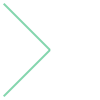

In [85]:
multi_line = MultiLineString([line_a, line_b])
multi_line

In [86]:
line_a.touches(line_a)

False

## Spatial Join
- Spatial join is yet another classic GIS problem. Getting attributes from one layer and transferring them into another layer based on their spatial relationship is something you most likely need to do on a regular basis.
- The previous materials focused on learning how to perform a Point in Polygon query. We could now apply those techniques and create our own function to perform a spatial join between two layers based on their spatial relationship. We could for example join the attributes of a polygon layer into a point layer where each point would get the attributes of a polygon that contains the point.
- Luckily, spatial join (gpd.sjoin() -function) is already implemented in Geopandas, thus we do not need to create it ourselves. There are three possible types of join that can be applied in spatial join that are determined with op -parameter:

- intersects
- within
- contains

## Download and clean the data

In [87]:
import geopandas as gpd

fp = './shapely/Vaestotietoruudukko_2015/Vaestotietoruudukko_2015.shp'
pop = gpd.read_file(fp)

In [89]:
pop.head() # ASUKKAITA : population

,INDEX,ASUKKAITA,ASVALJYYS,IKA0_9,IKA10_19,IKA20_29,IKA30_39,IKA40_49,IKA50_59,IKA60_69,IKA70_79,IKA_YLI80,geometry
0,688,8,31.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6689749.005069185,..."
1,703,6,42.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6685998.998064222,..."
2,710,8,44.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6684249.004130407,..."
3,711,7,64.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6683999.004997005,..."
4,715,19,23.0,99,99,99,99,99,99,99,99,99,"POLYGON ((25472499.99532626 6682998.998461431,..."


In [90]:
pop = pop.rename(columns={'ASUKKAITA': 'pop15'})

In [91]:
pop.columns

Index(['INDEX', 'pop15', 'ASVALJYYS', 'IKA0_9', 'IKA10_19', 'IKA20_29',
       'IKA30_39', 'IKA40_49', 'IKA50_59', 'IKA60_69', 'IKA70_79', 'IKA_YLI80',
       'geometry'],
      dtype='object')

In [93]:
pop = pop[['pop15', 'geometry']]
pop.tail()

,pop15,geometry
5779,14,"POLYGON ((25513249.99872951 6685748.99893082, ..."
5780,15,"POLYGON ((25513249.99872951 6685498.999797418,..."
5781,6,"POLYGON ((25513499.99632164 6686499.006332992,..."
5782,9,"POLYGON ((25513499.99632164 6685498.999797418,..."
5783,30244,"POLYGON ((25513999.999929 6659998.998172711, 2..."


### Join the layers

In [ ]:
# Addresses filpath
In [7]: addr_fp = r"/home/geo/addresses_epsg3879.shp"

# Read data
In [8]: addresses = gpd.read_file(addr_fp)

# Check the head of the file
In [9]: addresses.head(2)
Out[9]: 
                                 address    id  \
0  Kampinkuja 1, 00100 Helsinki, Finland  1001   
1   Kaivokatu 8, 00101 Helsinki, Finland  1002   

                                      geometry  
0  POINT (25496123.30852197 6672833.941567578)  
1  POINT (25496774.28242895 6672999.698581985)  

In [ ]:
# Check the crs of address points
In [10]: addresses.crs
Out[10]: 
{'ellps': 'GRS80',
 'k': 1,
 'lat_0': 0,
 'lon_0': 25,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 25500000,
 'y_0': 0}

# Check the crs of population layer
In [11]: pop.crs
Out[11]: 
{'ellps': 'GRS80',
 'k': 1,
 'lat_0': 0,
 'lon_0': 25,
 'no_defs': True,
 'proj': 'tmerc',
 'units': 'm',
 'x_0': 25500000,
 'y_0': 0}

# Do they match? - We can test that
In [12]: addresses.crs == pop.crs
Out[12]: True

In [ ]:
# Make a spatial join
In [13]: join = gpd.sjoin(addresses, pop, how="inner", op="within")

# Let's check the result
In [14]: join.head()
Out[14]: 
                                          address    id  \
16  Malminkartanontie 17, 00410 Helsinki, Finland  1017   
19     Pitäjänmäentie 15, 00370 Helsinki, Finland  1020   
12       Trumstigen 8, 00420 Helsingfors, Finland  1013   
11           Kuparitie 8, 00440 Helsinki, Finland  1012   
15            Kylätie 23, 00320 Helsinki, Finland  1016   

                                       geometry  index_right  pop15  
16  POINT (25492349.68368251 6681772.551210108)         2684     74  
19  POINT (25492292.61413005 6679039.264838208)         2691    241  
12  POINT (25493207.62503373 6680836.727432437)         2852    577  
11  POINT (25493575.10327127 6679775.868274149)         2949    562  
15   POINT (25494077.1680778 6678341.639159317)         3036    414  

In [ ]:
In [15]: import matplotlib.pyplot as plt

# Plot the points with population info
In [16]: join.plot(column='pop15', cmap="Reds", markersize=7, scheme='natural_breaks', legend=True);

# Add title
In [17]: plt.title("Amount of inhabitants living close the the point");

# Remove white space around the figure
In [18]: plt.tight_layout()

# Lesson 4
- Reclassify data based on different criteria 
- do a simple overlay analysis such as selecting data from one layer based on boundaries of another layer
- Aggregate data 

In [94]:
border_fp = './shapely/Data/Helsinki_borders.shp'
grid_fp = './shapely/Data/TravelTimes_to_5975375_RailwayStation.shp'

In [95]:
grid = gpd.read_file(grid_fp)
hel = gpd.read_file(border_fp)

In [96]:
hel.crs

{'init': 'epsg:3067'}

In [97]:
grid.crs

{'init': 'epsg:3067'}

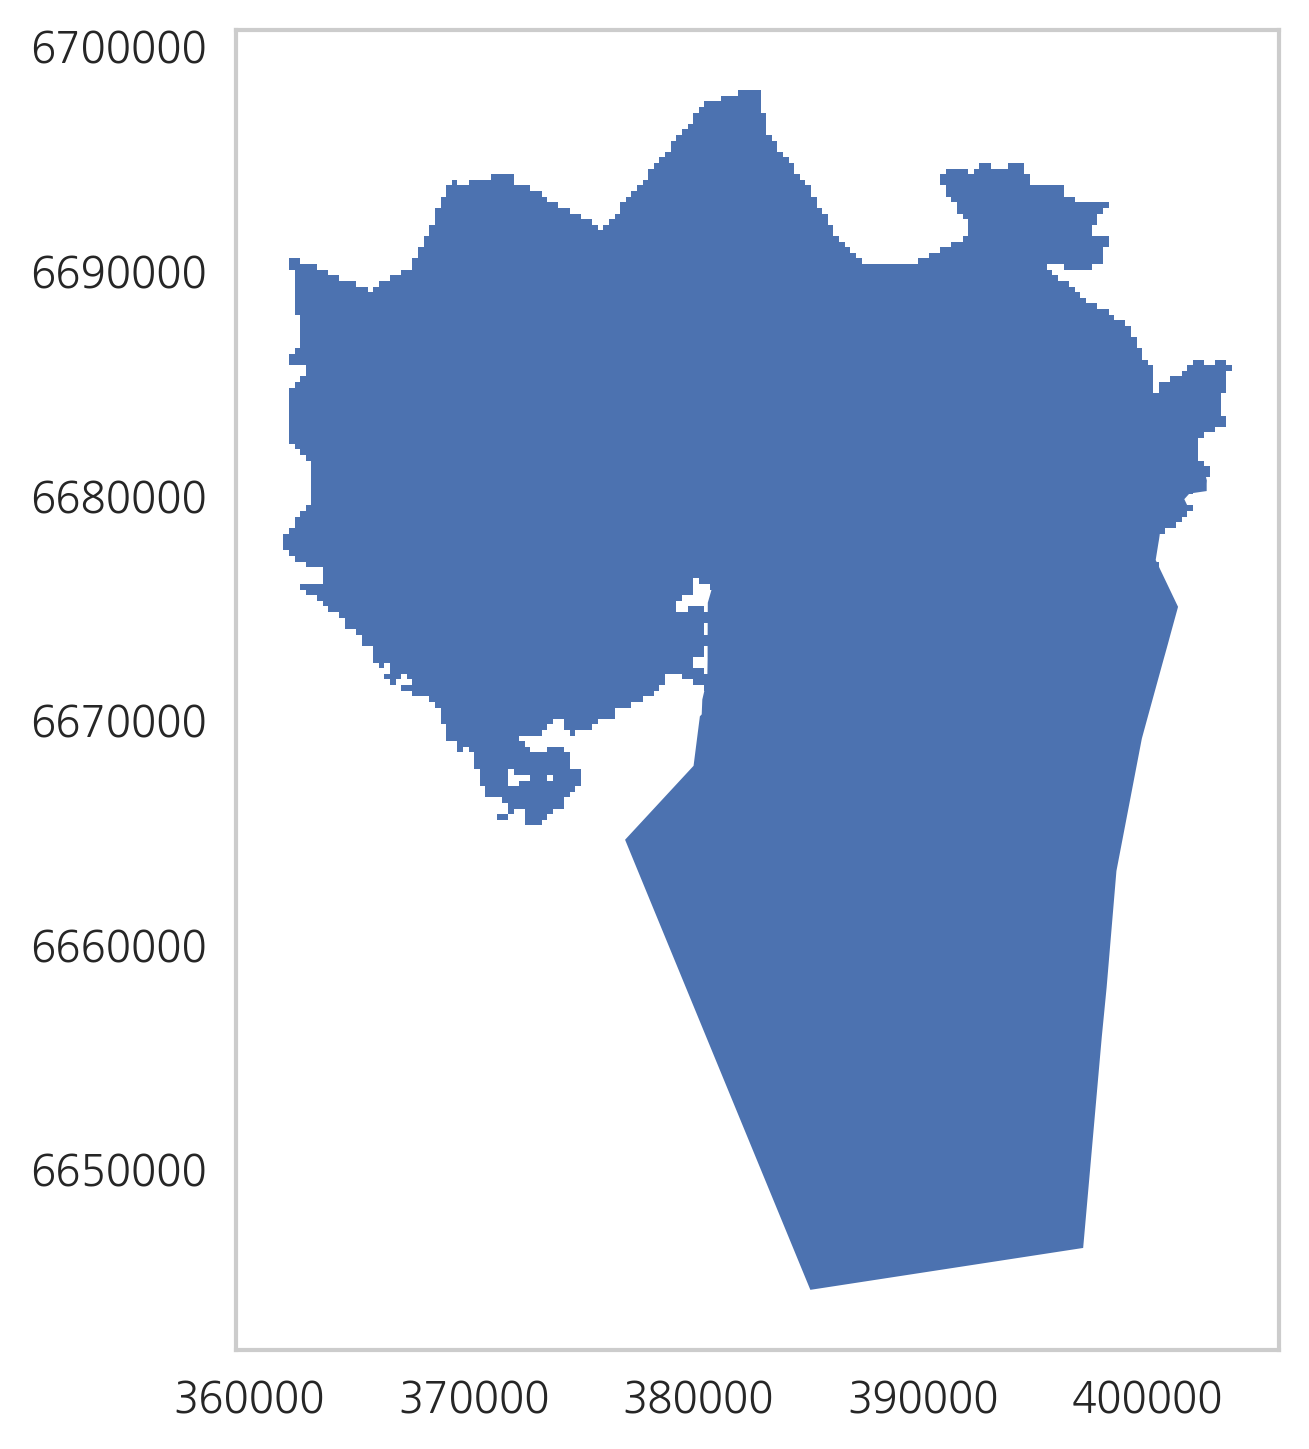

In [99]:
basemap = hel.plot()
grid.plot(ax=basemap, linewidth=0.02)
plt.grid(False)
plt.tight_layout()

- for performance : check https://automating-gis-processes.github.io/2016/Lesson4-geometric-operations.html#performance-tip

In [100]:
result = gpd.overlay(grid, hel, how='intersection')

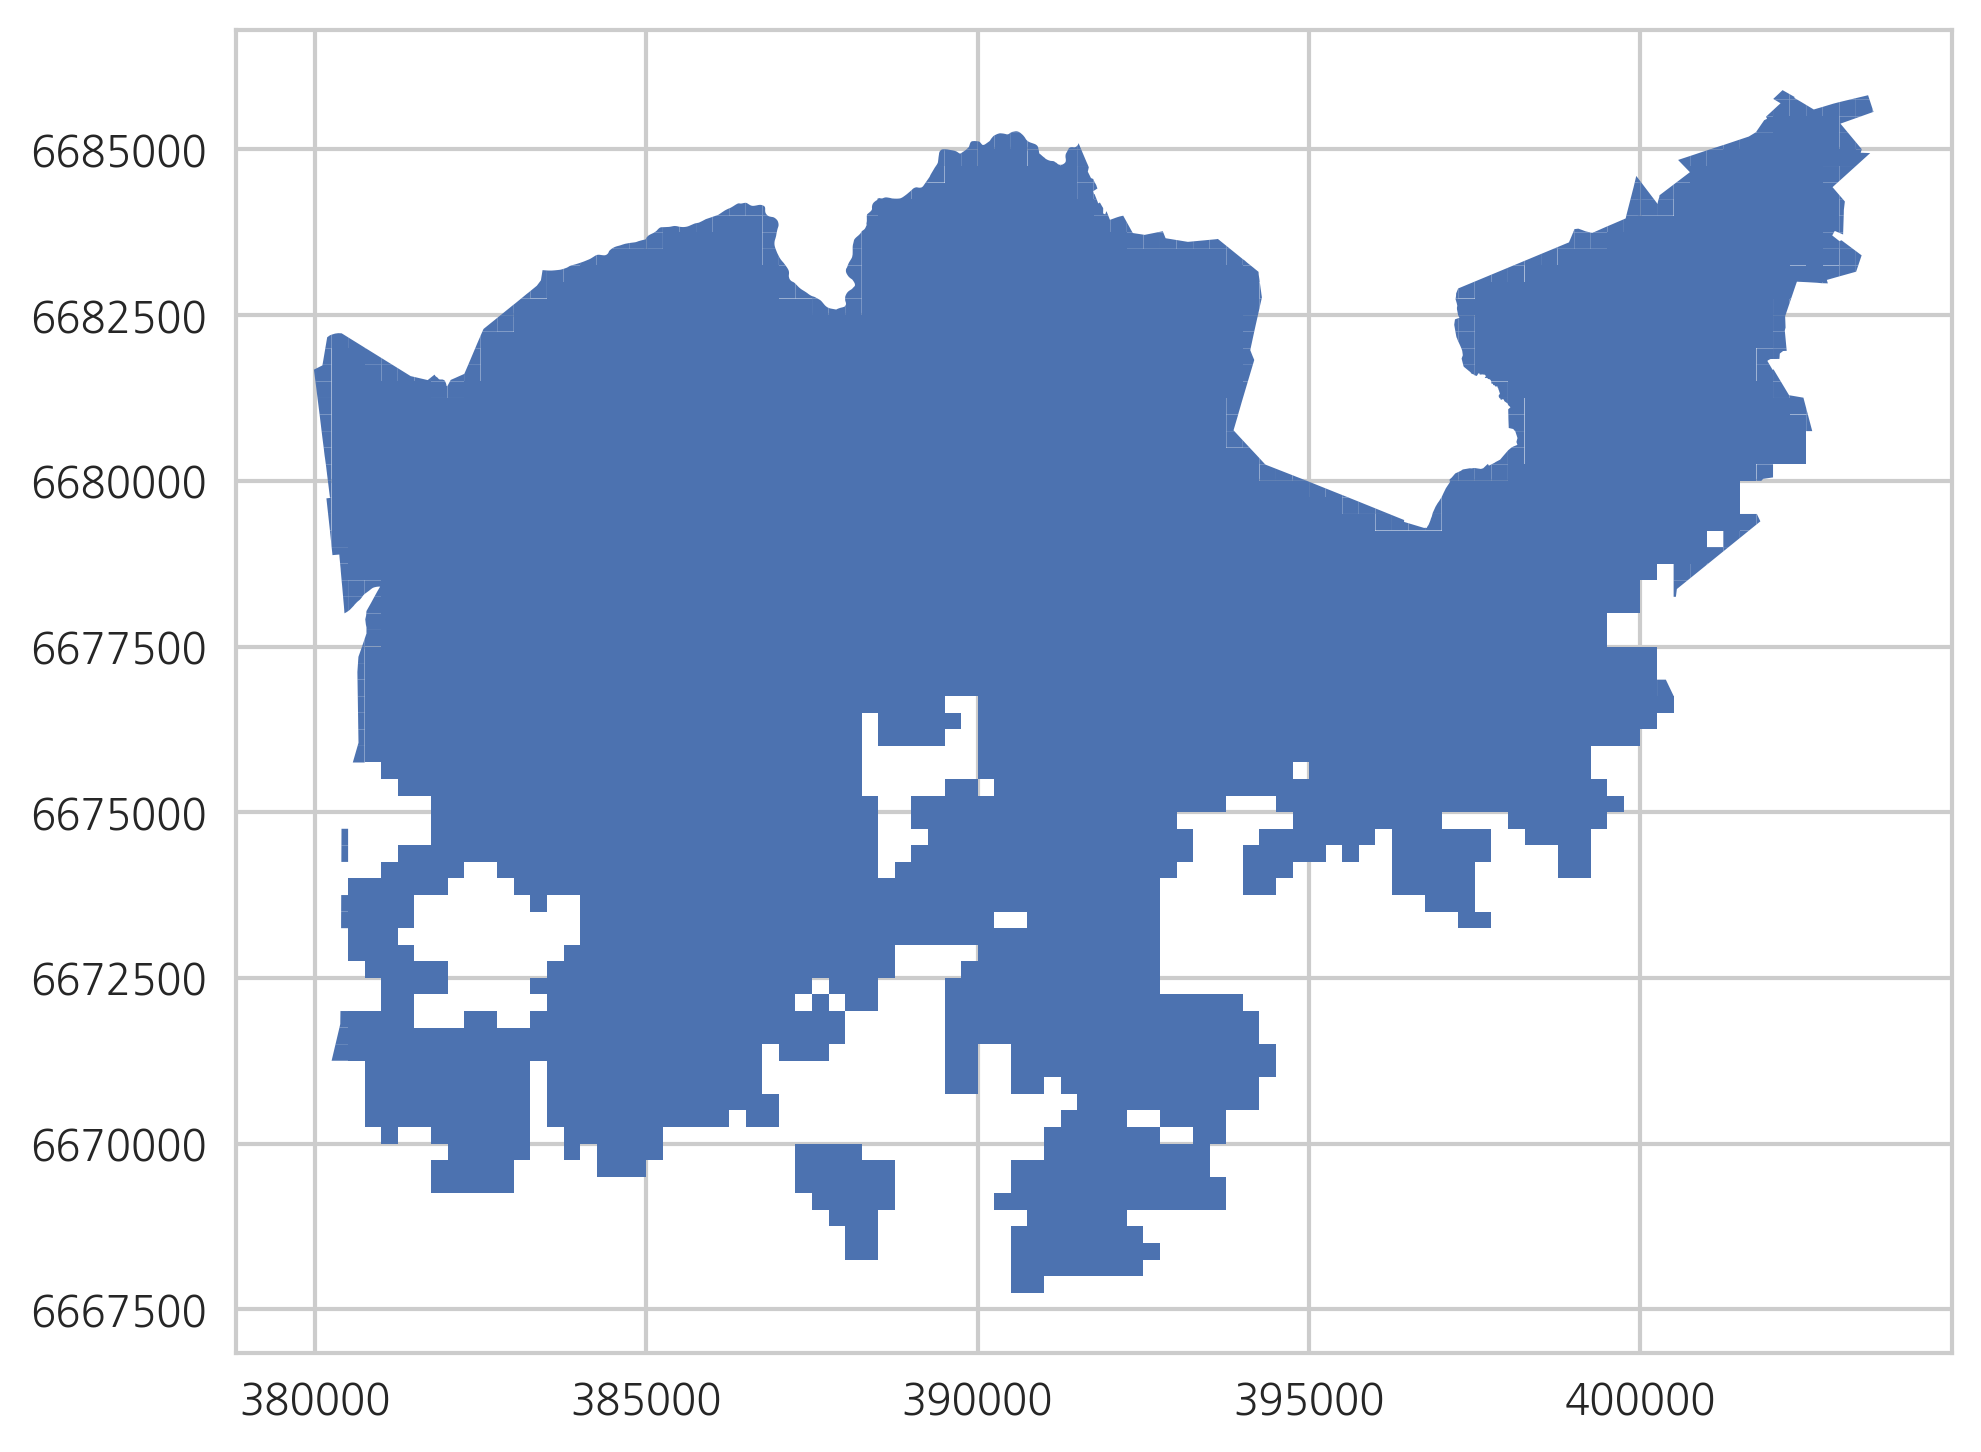

In [101]:
result.plot(color='b')
plt.tight_layout()

In [102]:
result.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,15981,36,15988,41,6002702,14698,65,73,14698,61,72,5975375,14456,207,27517366,Helsinki,Helsingfors,091,"POLYGON ((391000.0001349226 6667750.00004299, ..."
1,16190,34,16197,39,6002701,14661,64,73,14661,60,72,5975375,14419,206,27517366,Helsinki,Helsingfors,091,"POLYGON ((390750.0001349644 6668000.000042951,..."
2,15727,33,15733,37,6001132,14256,59,69,14256,55,62,5975375,14014,200,27517366,Helsinki,Helsingfors,091,"POLYGON ((391000.0001349143 6668000.000042943,..."
3,15975,33,15982,37,6001131,14512,62,73,14512,58,70,5975375,14270,204,27517366,Helsinki,Helsingfors,091,"POLYGON ((390750.0001349644 6668000.000042951,..."
4,16136,35,16143,40,6001138,14730,65,73,14730,61,72,5975375,14212,203,27517366,Helsinki,Helsingfors,091,"POLYGON ((392500.0001346234 6668000.000042901,..."


In [103]:
len(result)

3836

In [104]:
len(grid)

13231

- Let’s save our result grid as a GeoJSON file that is another commonly used file format nowadays for storing spatial data.

In [106]:
resultfp = './shapely/Processed_data/TravelTimes_to_5975375_RailwayStation_Helsinki.geojson'
result.to_file(resultfp, driver="GeoJSON")

- There are many more examples for different types of overlay analysis in Geopandas documentation where you can go and learn more.
- http://geopandas.org/set_operations.html

# Batch Handling

In [ ]:
import geopandas as gpd
import numpy as np

# File paths
border_fp = "/home/geo/data/Helsinki_borders.shp"
grid_fp = "/home/geo/data/TravelTimes_to_5975375_RailwayStation.shp"

# Read files
grid = gpd.read_file(grid_fp)
hel = gpd.read_file(border_fp)

# Batch size
b = 10

# Number of iterations (round up with np.ceil) and convert to integer
row_cnt = len(grid)
iterations = int(np.ceil(row_cnt / b))

# Final result
final = gpd.GeoDataFrame()

# Set the start and end index according the batch size
start_idx = 0
end_idx = start_idx + b

for iteration in range(iterations):
    print("Iteration: %s/%s" % (iteration, iterations))

    # Make an overlay analysis using a subset of the rows
    result = gpd.overlay(grid[start_idx:end_idx], hel, how='intersection')

    # Append the overlay result to final GeoDataFrame
    final = final.append(result)

    # Update indices
    start_idx += b
    end_idx = start_idx + b

# Save the output as GeoJSON
outfp = "/home/geo/data/overlay_analysis_speedtest.geojson"
final.to_file(outfp, driver="GeoJSON")

## Aggregation data

- Aggregating data can also be useful sometimes. What we mean by aggregation is that we basically merge Geometries into together by some common identifier. Suppose we are interested in studying continents, but we only have country-level data like the country dataset. By aggregation we would convert this into a continent-level dataset.

Let’s aggregate our travel time data by car travel times, i.e. the grid cells that have the same travel time to Railway Station will be merged together.

In [107]:
result_aggregated = result.dissolve(by="car_r_t")
result_aggregated.head()


,geometry,car_m_d,car_m_t,car_r_d,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE
car_r_t,,,,,,,,,,,,,,,,,,
-1,(POLYGON ((388000.0001354737 6669000.000042855...,-1,-1,-1,5996387,-1,-1,-1,-1,-1,-1,-1,-1,-1,27517366,Helsinki,Helsingfors,091
0,"POLYGON ((386000.0001357812 6672000.000042388,...",0,0,0,5975375,0,0,0,0,0,0,5975375,0,0,27517366,Helsinki,Helsingfors,091
7,"POLYGON ((386250.0001357396 6671750.000042424,...",1059,7,1059,5977007,447,6,6,447,6,6,5975375,447,6,27517366,Helsinki,Helsingfors,091
8,(POLYGON ((386250.0001357467 6671500.000042468...,1207,8,1207,5978638,1026,9,11,1026,9,11,5975375,774,11,27517366,Helsinki,Helsingfors,091
9,(POLYGON ((387000.0001355996 6671500.000042449...,1768,8,1768,5980269,1274,11,15,1274,11,15,5975375,1210,17,27517366,Helsinki,Helsingfors,091


In [108]:
len(result)

3836

In [109]:
len(result_aggregated)

51

## Data reclassification
- classify the lakes into big and small lakes where
  1. a big lake is a lake that is larger than the average size of all lakes in our study region
  2. a small lake ^ vice versa
- use travel times and distances to find out
  1. good locations to buy an apartment with good public tranportation accessibility to city center
  2. but from a bit further away from city center where the prices are lower (or at least we assume so).
- use ready made classifiers from pysal -module to classify travel times into multiple classes.

In [110]:
fp = './shapely/Data/Corine2012_Uusimaa.shp'
data = gpd.read_file(fp)

In [111]:
data.head()

,Level1,Level1Eng,Level1Suo,Level2,Level2Eng,Level2Suo,Level3,Level3Eng,Level3Suo,Luokka3,geometry
0,1,Artificial surfaces,Rakennetut alueet,11,Urban fabric,Asuinalueet,112,Discontinuous urban fabric,Väljästi rakennetut asuinalueet,112,"POLYGON ((279500 6640640, 279507.469 6640635.3..."
1,1,Artificial surfaces,Rakennetut alueet,11,Urban fabric,Asuinalueet,112,Discontinuous urban fabric,Väljästi rakennetut asuinalueet,112,"POLYGON ((313620 6655820, 313639.8910000001 66..."
2,1,Artificial surfaces,Rakennetut alueet,11,Urban fabric,Asuinalueet,112,Discontinuous urban fabric,Väljästi rakennetut asuinalueet,112,"POLYGON ((399720 6680460, 399672.2120000001 66..."
3,3,Forests and semi-natural areas,Metsät sekä avoimet kankaat ja kalliomaat,32,Shrub and/or herbaceous vegetation associations,Harvapuustoiset metsät ja pensastot,324,Transitional woodland/shrub,Harvapuustoiset alueet,324,"POLYGON ((469320 6718500, 469344.023 6718358.6..."
4,3,Forests and semi-natural areas,Metsät sekä avoimet kankaat ja kalliomaat,32,Shrub and/or herbaceous vegetation associations,Harvapuustoiset metsät ja pensastot,324,Transitional woodland/shrub,Harvapuustoiset alueet,324,"POLYGON ((403180 6718140, 403179.318 6718132.3..."


In [112]:
selected_cols = ['Level1', 'Level1Eng', 'Level2', 'Level2Eng', 'Level3', 'Level3Eng', 'Luokka3', 'geometry']
data = data[selected_cols]
data.columns

Index(['Level1', 'Level1Eng', 'Level2', 'Level2Eng', 'Level3', 'Level3Eng',
       'Luokka3', 'geometry'],
      dtype='object')

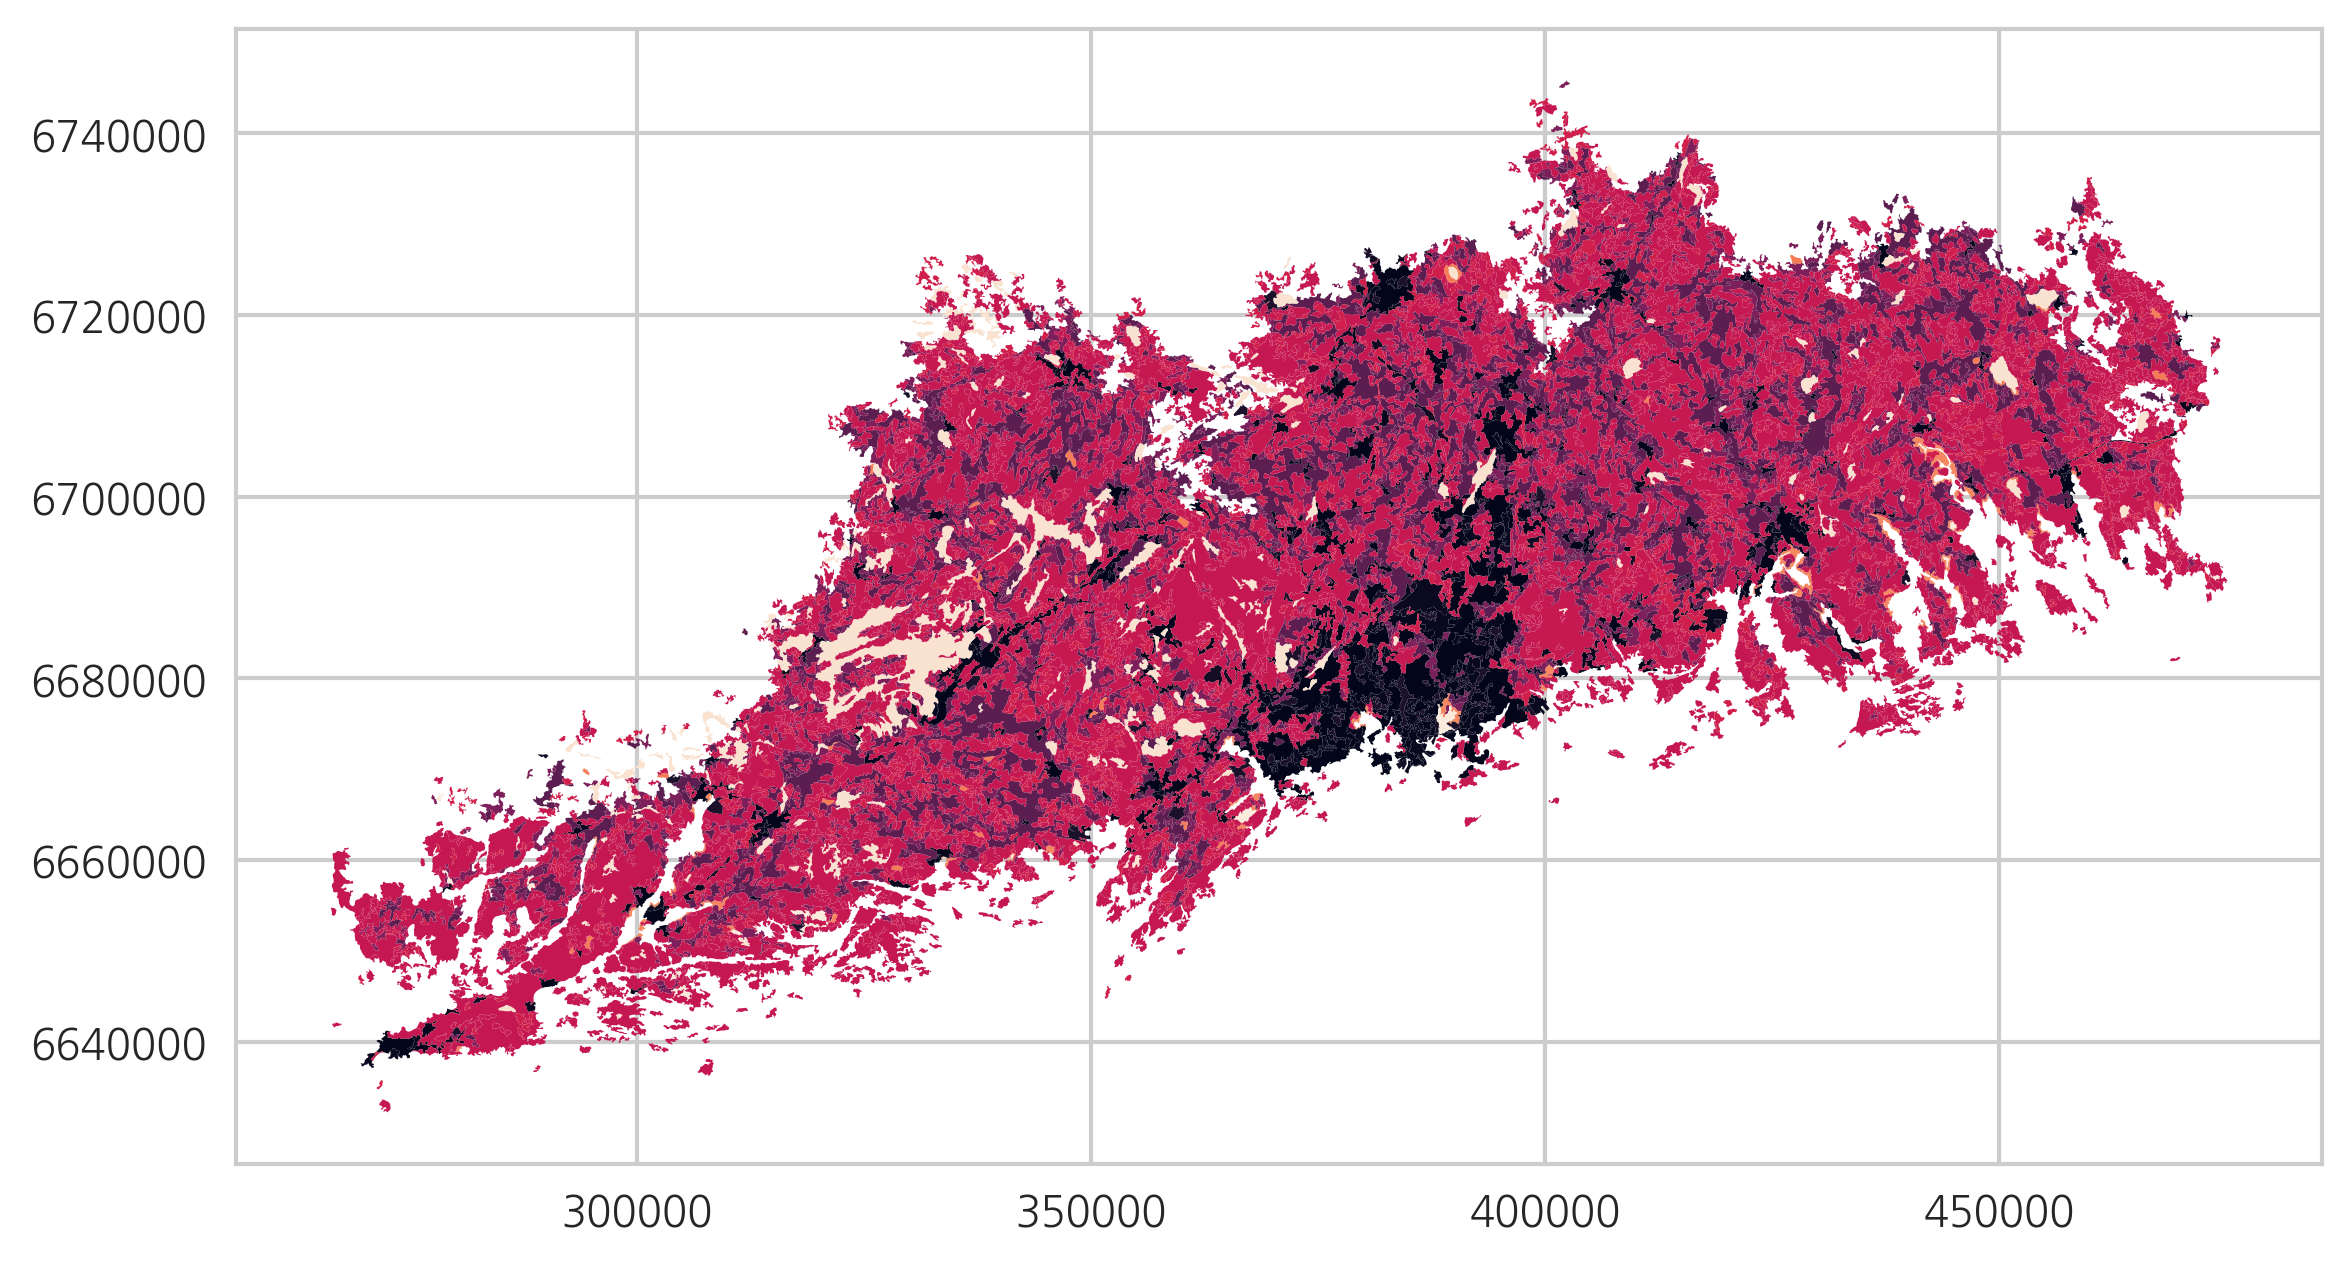

In [113]:
data.plot(column='Level3', linewidth=0.05)
plt.tight_layout()

In [114]:
list(data['Level3Eng'].unique())

['Discontinuous urban fabric',
 'Transitional woodland/shrub',
 'Non-irrigated arable land',
 'Fruit trees and berry plantations',
 'Pastures',
 'Land principally occupied by agriculture, with significant areas of natural vegetation',
 'Bare rock',
 'Inland marshes',
 'Peatbogs',
 'Salt marshes',
 'Water courses',
 'Water bodies',
 'Sea and ocean',
 'Industrial or commercial units',
 'Road and rail networks and associated land',
 'Port areas',
 'Airports',
 'Mineral extraction sites',
 'Broad-leaved forest',
 'Dump sites',
 'Coniferous forest',
 'Construction sites',
 'Green urban areas',
 'Sport and leisure facilities',
 'Mixed forest']

- Okey we have plenty of different kind of land covers in our data. Let’s select only lakes from our data. Selecting specific rows from a DataFrame based on some value(s) is easy to do in Pandas / Geopandas using a specific indexer called .ix[], read more from here..

In [116]:
lakes = data.loc[data['Level3Eng'] == 'Water bodies'].copy()
lakes.head()

,Level1,Level1Eng,Level2,Level2Eng,Level3,Level3Eng,Luokka3,geometry
1388,5,Water bodies,51,Inland waters,512,Water bodies,512,"POLYGON ((298388.189 6642944.189999999, 298364..."
1389,5,Water bodies,51,Inland waters,512,Water bodies,512,"POLYGON ((286629.2579999999 6643429.219000001,..."
1390,5,Water bodies,51,Inland waters,512,Water bodies,512,"POLYGON ((300239.023 6649391.484, 300228.203 6..."
1391,5,Water bodies,51,Inland waters,512,Water bodies,512,"POLYGON ((300722.226 6650140.234, 300776.601 6..."
1392,5,Water bodies,51,Inland waters,512,Water bodies,512,"POLYGON ((312060 6651400, 312069.7660000001 66..."


### Calculations in DataFrame

In [117]:
data.crs

{'ellps': 'GRS80', 'no_defs': True, 'proj': 'utm', 'units': 'm', 'zone': 35}

In [118]:
lakes['area'] = lakes.area
lakes['area'].head(2)

1388    268310.708164
1389    917661.921348
Name: area, dtype: float64

In [119]:
lakes['area_km2'] = lakes['area'] / 1000000
l_mean_size = lakes['area_km2'].mean()
l_mean_size

1.5828513727796711

### Classifying data

In [121]:
def binaryClassifier(row, source_col, output_col, threshold):
    # If area of input geometry is lower that the threshold value
    if row[source_col] < threshold:
        # Update the output column with value 0
        row[output_col] = 0
    # If area of input geometry is higher than the threshold value update with value 1
    else:
        row[output_col] = 1
    # Return the updated row
    return row

In [122]:
lakes['small_big'] = None

In [123]:
 lakes = lakes.apply(binaryClassifier, source_col='area_km2', output_col='small_big', threshold=l_mean_size, axis=1)

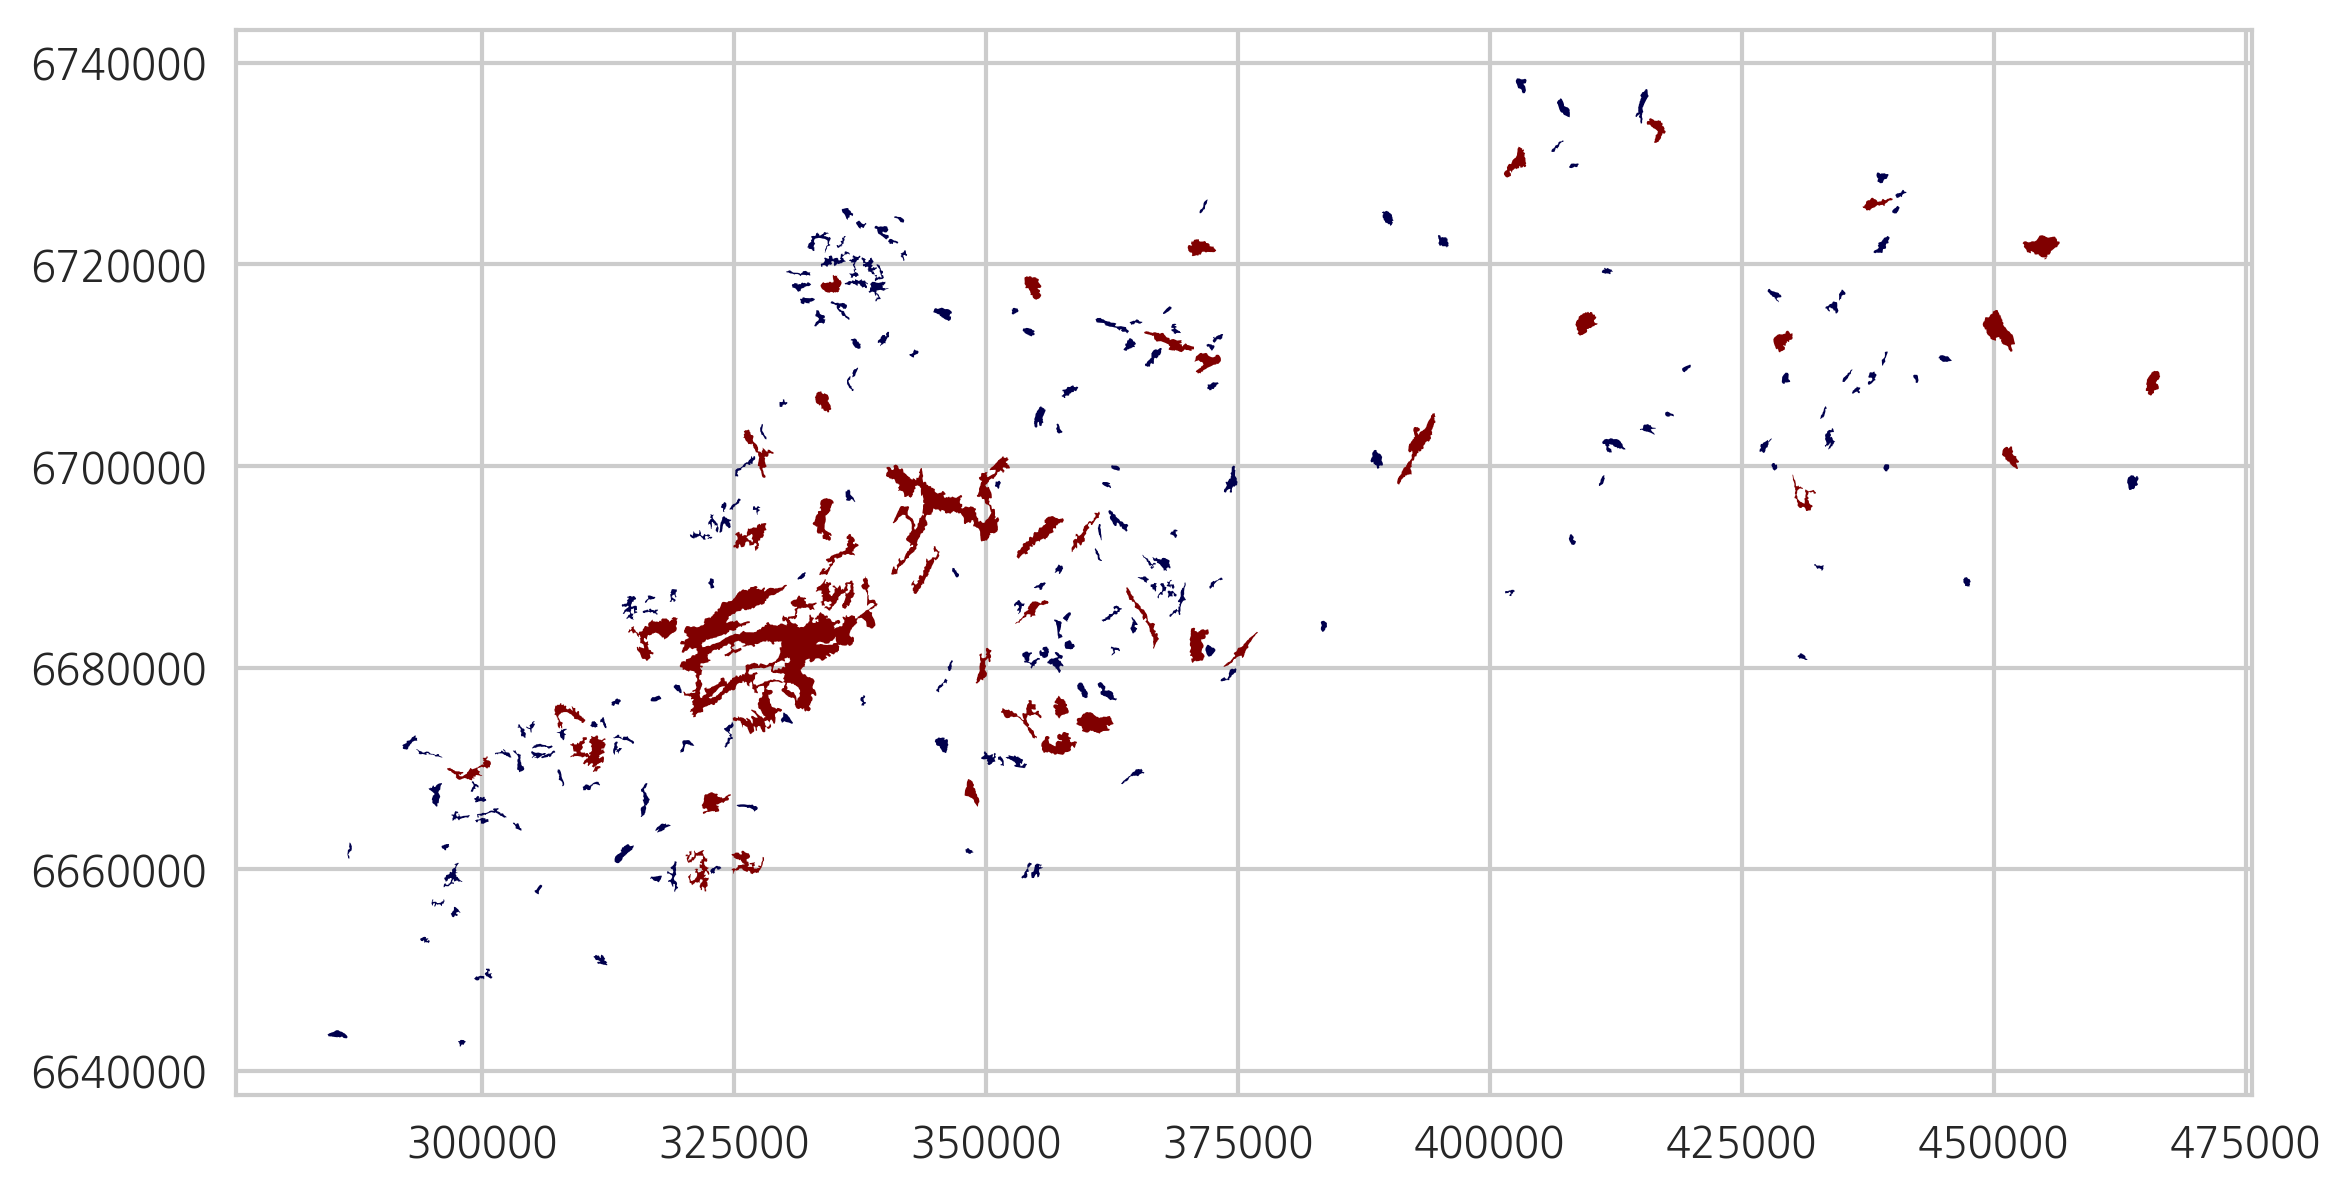

In [124]:
lakes.plot(column='small_big', linewidth=0.05, cmap='seismic')
plt.tight_layout()

### Multicriteria data classification

In [125]:
def customClassifier2(row, src_col1, src_col2, threshold1, threshold2, output_col):
    # 1. If the value in src_col1 is LOWER than the threshold1 value
    # 2. AND the value in src_col2 is HIGHER than the threshold2 value, give value 1, otherwise give 0
    if row[src_col1] < threshold1 and row[src_col2] > threshold2:
        # Update the output column with value 0
        row[output_col] = 1
    # If area of input geometry is higher than the threshold value update with value 1
    else:
        row[output_col] = 0

    # Return the updated row
    return row

In [126]:
fp = r'./shapely/Processed_data/TravelTimes_to_5975375_RailwayStation_Helsinki.geojson'
acc = gpd.read_file(fp)
acc.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,15981,36,15988,41,6002702,14698,65,73,14698,61,72,5975375,14456,207,27517366,Helsinki,Helsingfors,091,"POLYGON ((391000.0001349226 6667750.00004299, ..."
1,16190,34,16197,39,6002701,14661,64,73,14661,60,72,5975375,14419,206,27517366,Helsinki,Helsingfors,091,"POLYGON ((390750.0001349644 6668000.000042951,..."
2,15727,33,15733,37,6001132,14256,59,69,14256,55,62,5975375,14014,200,27517366,Helsinki,Helsingfors,091,"POLYGON ((391000.0001349143 6668000.000042943,..."
3,15975,33,15982,37,6001131,14512,62,73,14512,58,70,5975375,14270,204,27517366,Helsinki,Helsingfors,091,"POLYGON ((390750.0001349644 6668000.000042951,..."
4,16136,35,16143,40,6001138,14730,65,73,14730,61,72,5975375,14212,203,27517366,Helsinki,Helsingfors,091,"POLYGON ((392500.0001346234 6668000.000042901,..."


In [127]:
acc = acc.loc[acc['pt_r_tt'] >=0]

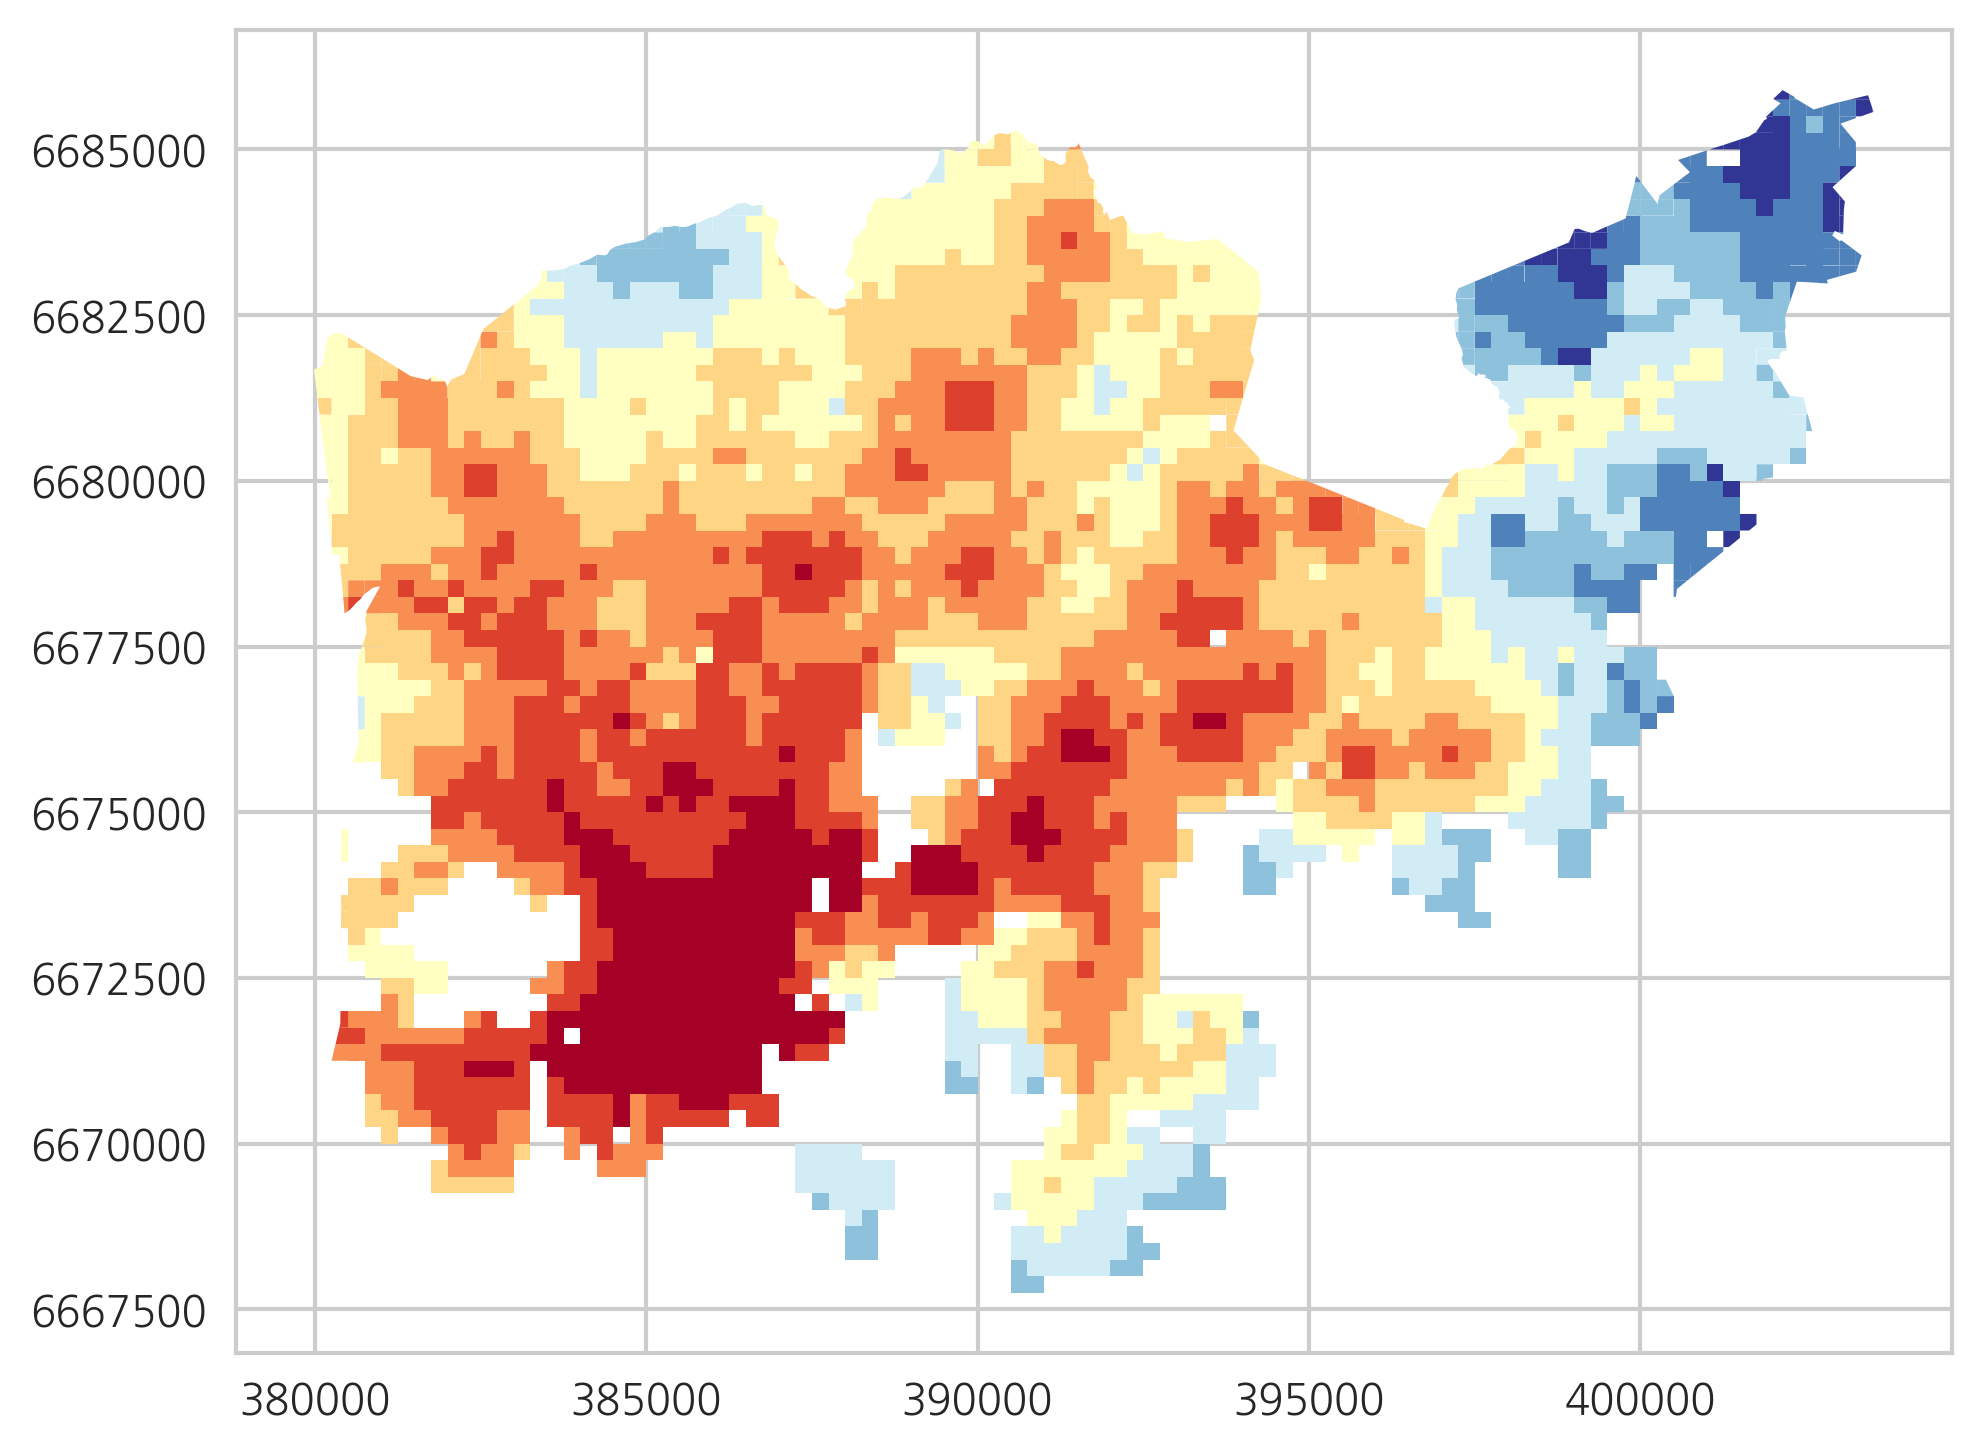

In [129]:
acc.plot(column="pt_r_tt", scheme="Fisher_Jenks", k=9, cmap="RdYlBu", linewidth=0)
plt.tight_layout()

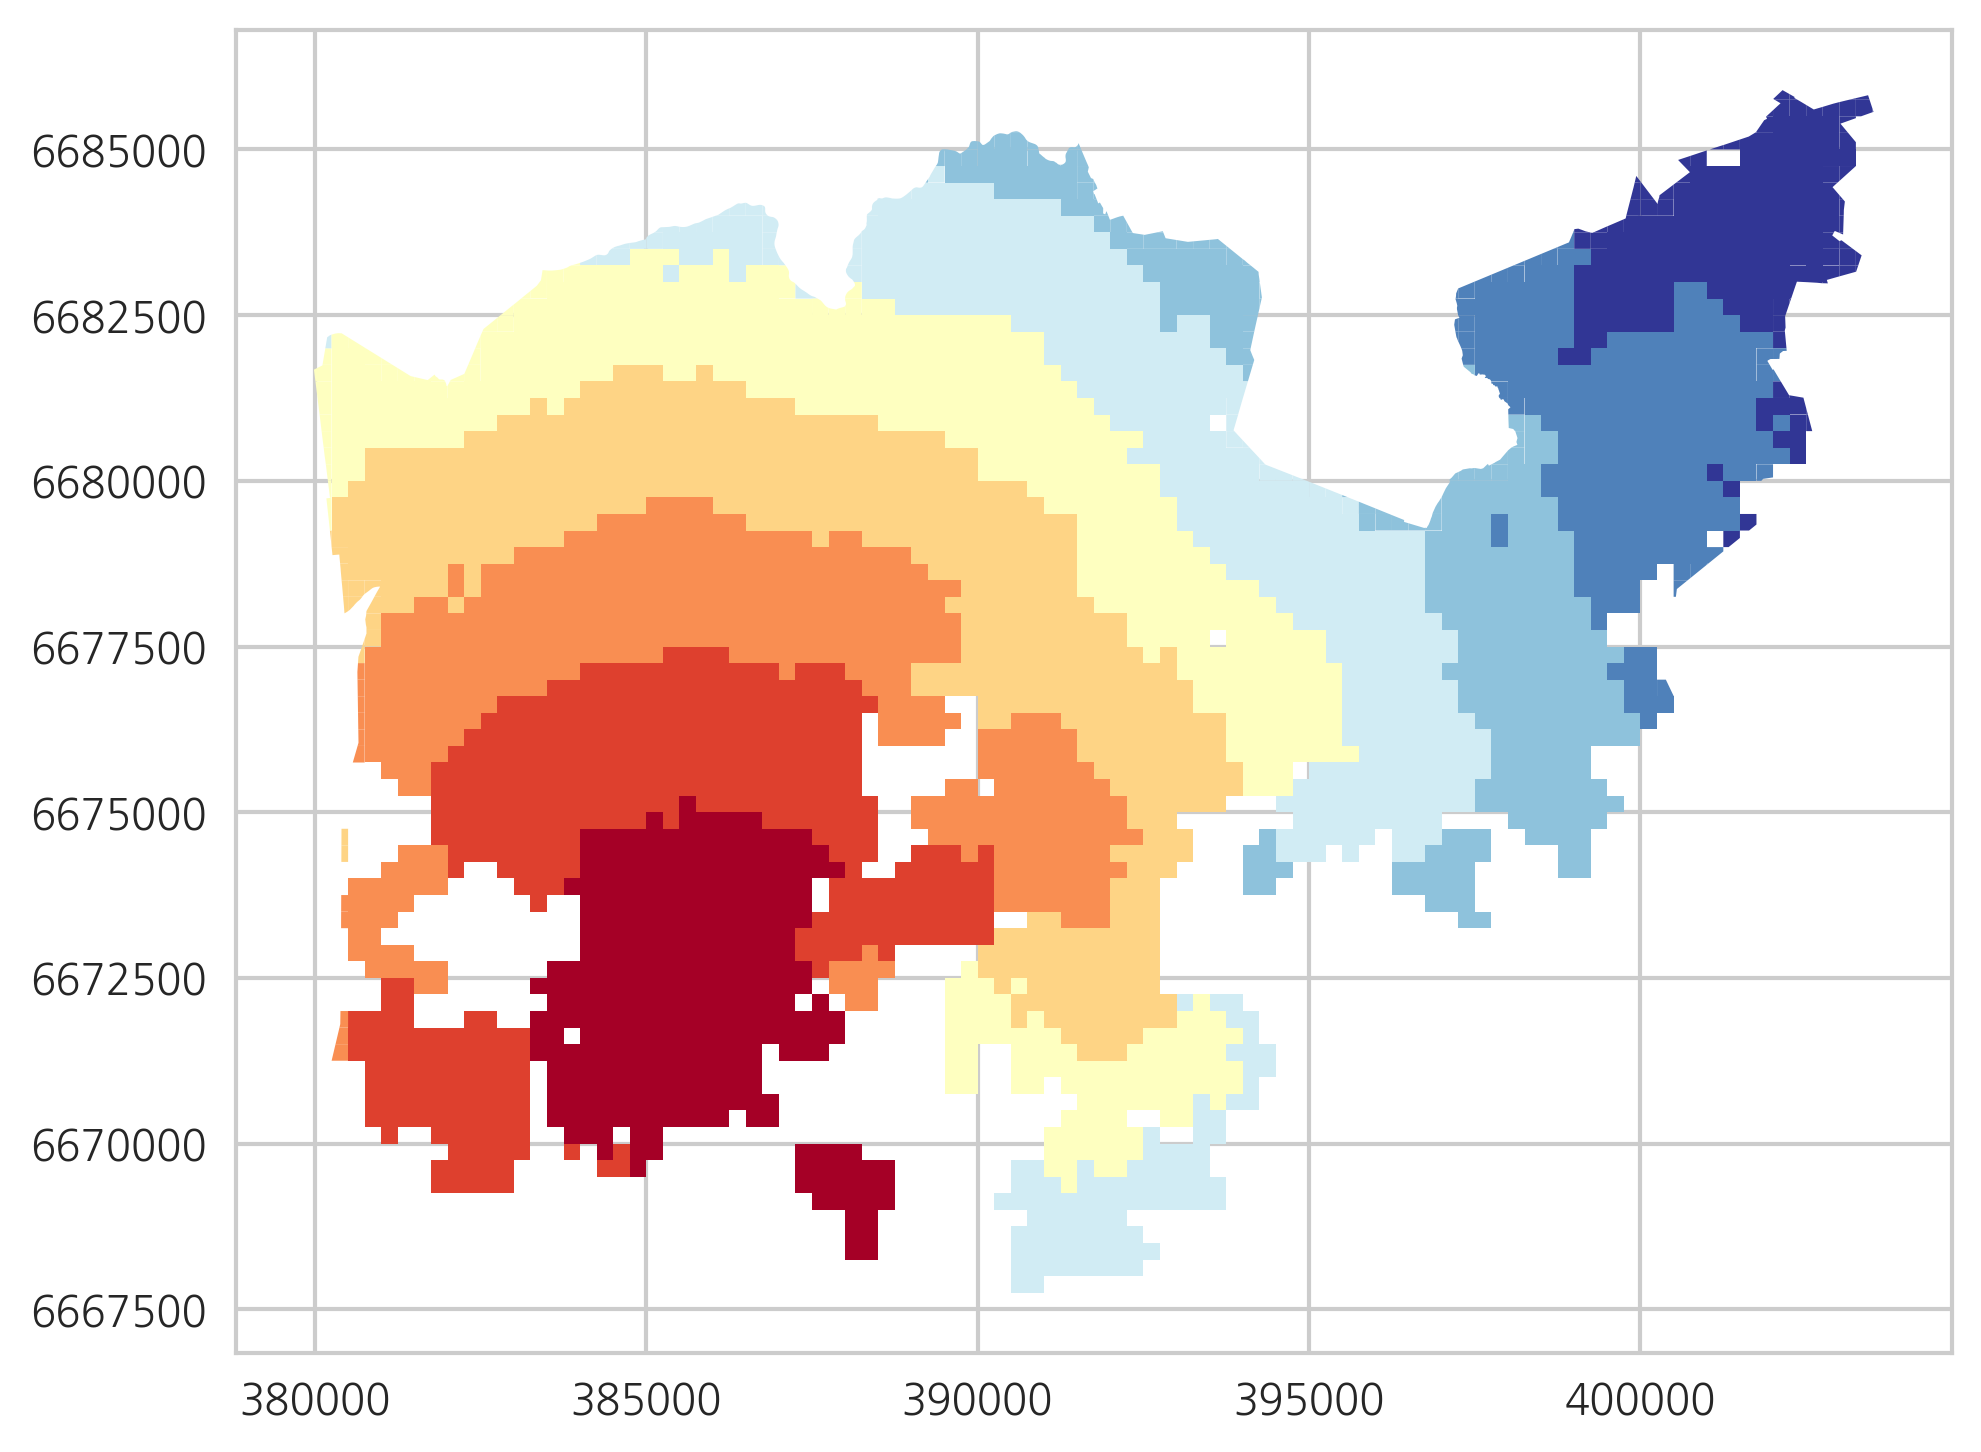

In [130]:
acc.plot(column='walk_d', scheme='Fisher_Jenks', k=9, cmap="RdYlBu", linewidth=0)
plt.tight_layout()

- Let’s finally do our classification based on two criteria and find out grid cells where the travel time is lower or equal to 20 minutes but they are further away than 4 km (4000 meters) from city center.

In [131]:
acc["Suitable_area"] = None

In [132]:
acc = acc.apply(customClassifier2, src_col1='pt_r_tt', src_col2='walk_d', threshold1=20, threshold2=4000, output_col="Suitable_area", axis=1)

In [133]:
acc.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry,Suitable_area
0,15981,36,15988,41,6002702,14698,65,73,14698,61,72,5975375,14456,207,27517366,Helsinki,Helsingfors,091,"POLYGON ((391000.0001349226 6667750.00004299, ...",0
1,16190,34,16197,39,6002701,14661,64,73,14661,60,72,5975375,14419,206,27517366,Helsinki,Helsingfors,091,"POLYGON ((390750.0001349644 6668000.000042951,...",0
2,15727,33,15733,37,6001132,14256,59,69,14256,55,62,5975375,14014,200,27517366,Helsinki,Helsingfors,091,"POLYGON ((391000.0001349143 6668000.000042943,...",0
3,15975,33,15982,37,6001131,14512,62,73,14512,58,70,5975375,14270,204,27517366,Helsinki,Helsingfors,091,"POLYGON ((390750.0001349644 6668000.000042951,...",0
4,16136,35,16143,40,6001138,14730,65,73,14730,61,72,5975375,14212,203,27517366,Helsinki,Helsingfors,091,"POLYGON ((392500.0001346234 6668000.000042901,...",0


In [134]:
acc['Suitable_area'].value_counts()

0    3808
1       9
Name: Suitable_area, dtype: int64

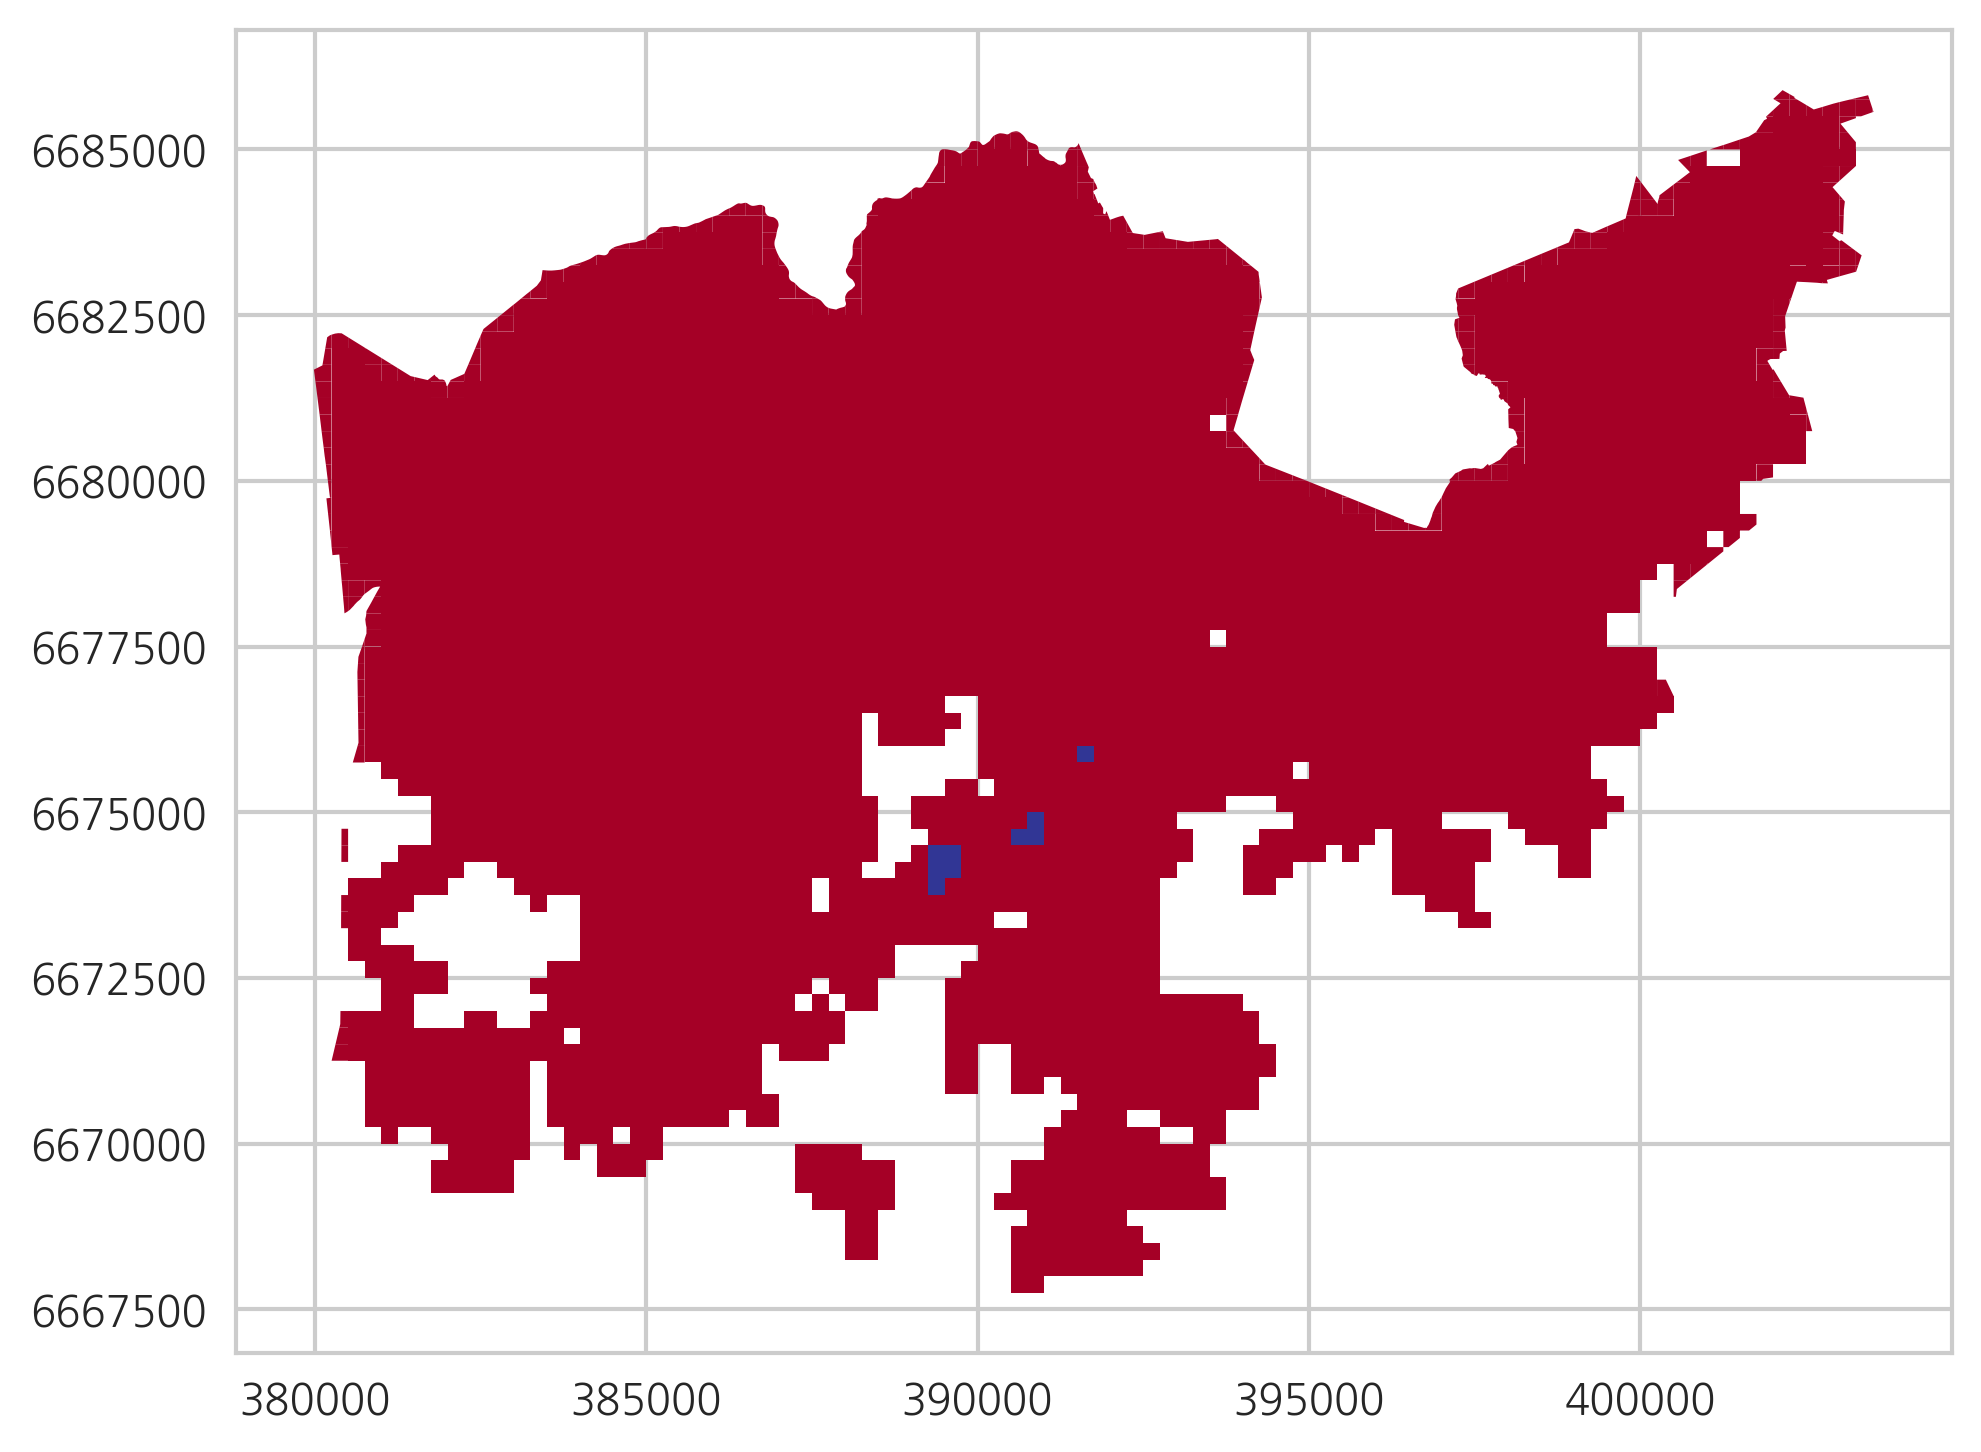

In [141]:
acc.plot(column='Suitable_area', cmap="RdYlBu", linewidth=0)
plt.tight_layout()

- A-haa, okey so we can see that suitable places for us with our criteria seem to be located in the eastern part from the city center. Actually, those locations are along the metro line which makes them good locations in terms of travel time to city center since metro is really fast travel mode.

### Classification based on common classifiers
* Box_Plot
* Equal_Interval
* Fisher_Jenks
* Fisher_Jenks_Sampled
* HeadTail_Breaks
* Jenks_Caspall
* Jenks_Caspall_Forced
* Jenks_Caspall_Sampled
* Max_P_Classifier
* Maximum_Breaks
* Natural_Breaks
* Quantiles
* Percentiles
* Std_Mean
* User_Defined

- http://pysal.readthedocs.io/en/latest/library/esda/mapclassify.html
- natural breaks : http://wiki-1-1930356585.us-east-1.elb.amazonaws.com/wiki/index.php/Jenks_Natural_Breaks_Classification

In [142]:
import pysal as ps
n_classes = 9


In [143]:
classifier = ps.Natural_Breaks.make(k=n_classes)

In [144]:
classifications = acc[['pt_r_tt']].apply(classifier)

In [145]:
classifications.head()

,pt_r_tt
0,7
1,7
2,6
3,7
4,7


In [146]:
classifications.columns = ['nb_pt_r_tt']

In [147]:
acc = acc.join(classifications)

In [148]:
acc.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,...,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry,Suitable_area,nb_pt_r_tt
0,15981,36,15988,41,6002702,14698,65,73,14698,61,...,5975375,14456,207,27517366,Helsinki,Helsingfors,091,"POLYGON ((391000.0001349226 6667750.00004299, ...",0,7
1,16190,34,16197,39,6002701,14661,64,73,14661,60,...,5975375,14419,206,27517366,Helsinki,Helsingfors,091,"POLYGON ((390750.0001349644 6668000.000042951,...",0,7
2,15727,33,15733,37,6001132,14256,59,69,14256,55,...,5975375,14014,200,27517366,Helsinki,Helsingfors,091,"POLYGON ((391000.0001349143 6668000.000042943,...",0,6
3,15975,33,15982,37,6001131,14512,62,73,14512,58,...,5975375,14270,204,27517366,Helsinki,Helsingfors,091,"POLYGON ((390750.0001349644 6668000.000042951,...",0,7
4,16136,35,16143,40,6001138,14730,65,73,14730,61,...,5975375,14212,203,27517366,Helsinki,Helsingfors,091,"POLYGON ((392500.0001346234 6668000.000042901,...",0,7


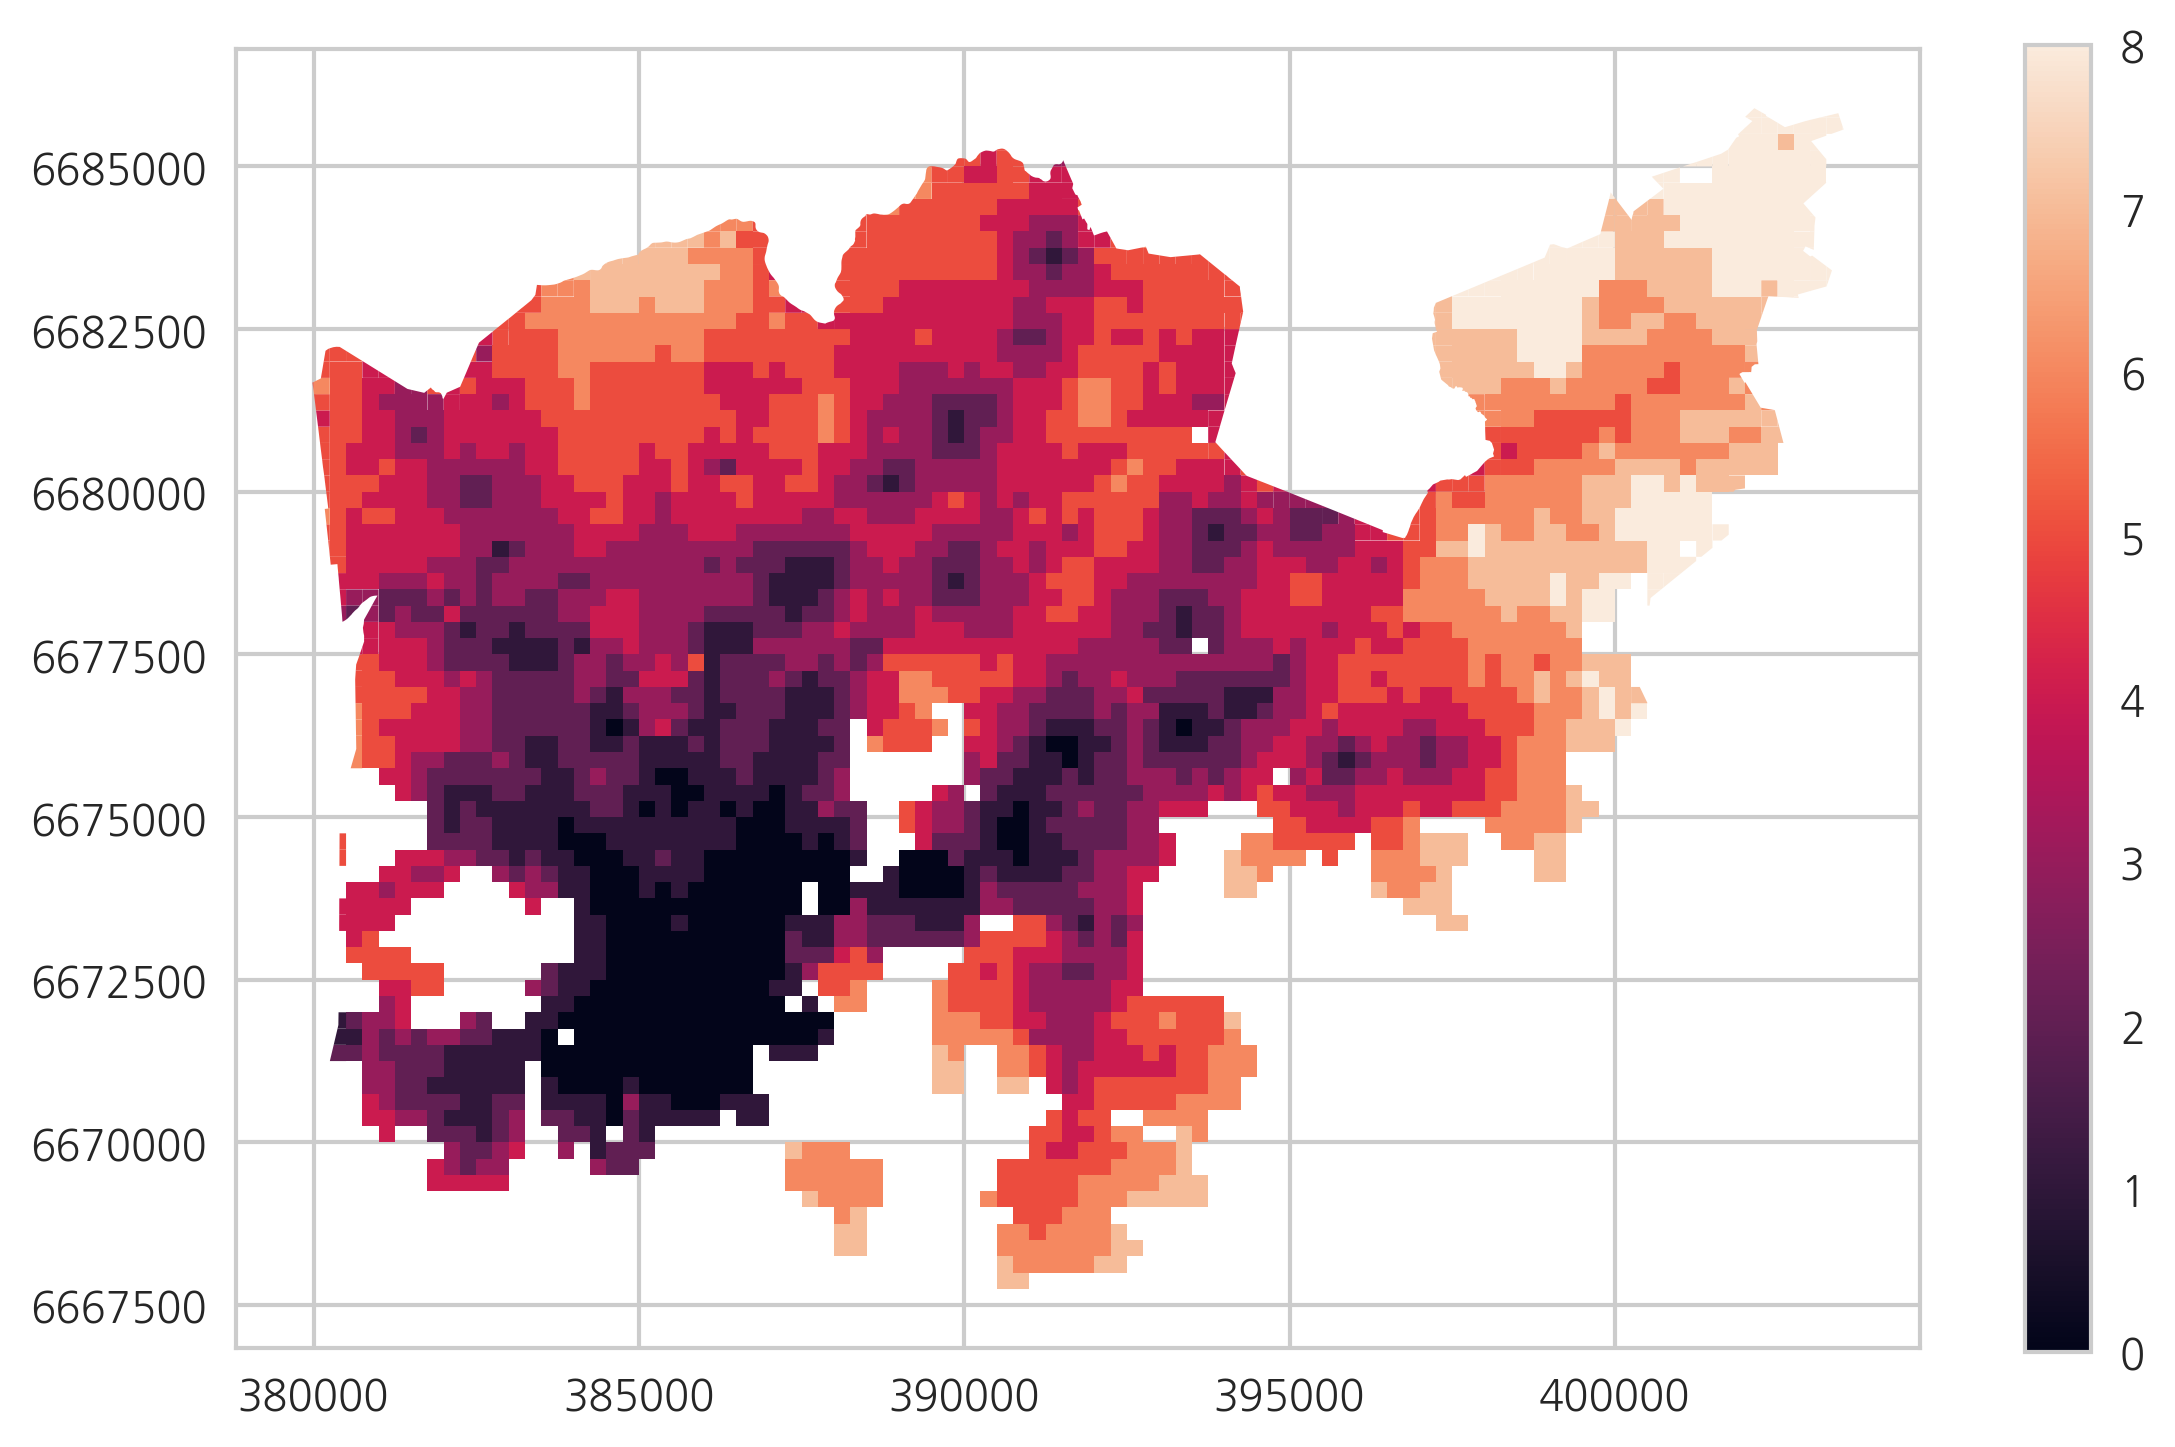

In [150]:
acc.plot(column="nb_pt_r_tt", linewidth=0, legend=True)
plt.tight_layout()

- kd Tree 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.cKDTree.html

# Lesson 5 : Visualization
- matplotlib
- Bokeh
- Folium



- mplleaflet
- Basemap
- GeoViews
> Objectives
> - Create a static map using Geopandas
> - Create a simple interactive map using either Bokeh or Folium (or both).
> - Share your maps (static / interactive) on GitHub using GitHub pages.

### Static maps

In [151]:
grid_fp = r'./shapely/dataE5/dataE5/TravelTimes_to_5975375_RailwayStation.shp'
roads_fp = r'./shapely/dataE5/dataE5/roads.shp'
metro_fp = r'./shapely/dataE5/dataE5/metro.shp'

grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [152]:
# Get the CRS of the grid
gridCRS = grid.crs

# Reproject geometries using the crs of travel time grid
roads['geometry'] = roads['geometry'].to_crs(crs=gridCRS)
metro['geometry'] = metro['geometry'].to_crs(crs=gridCRS)

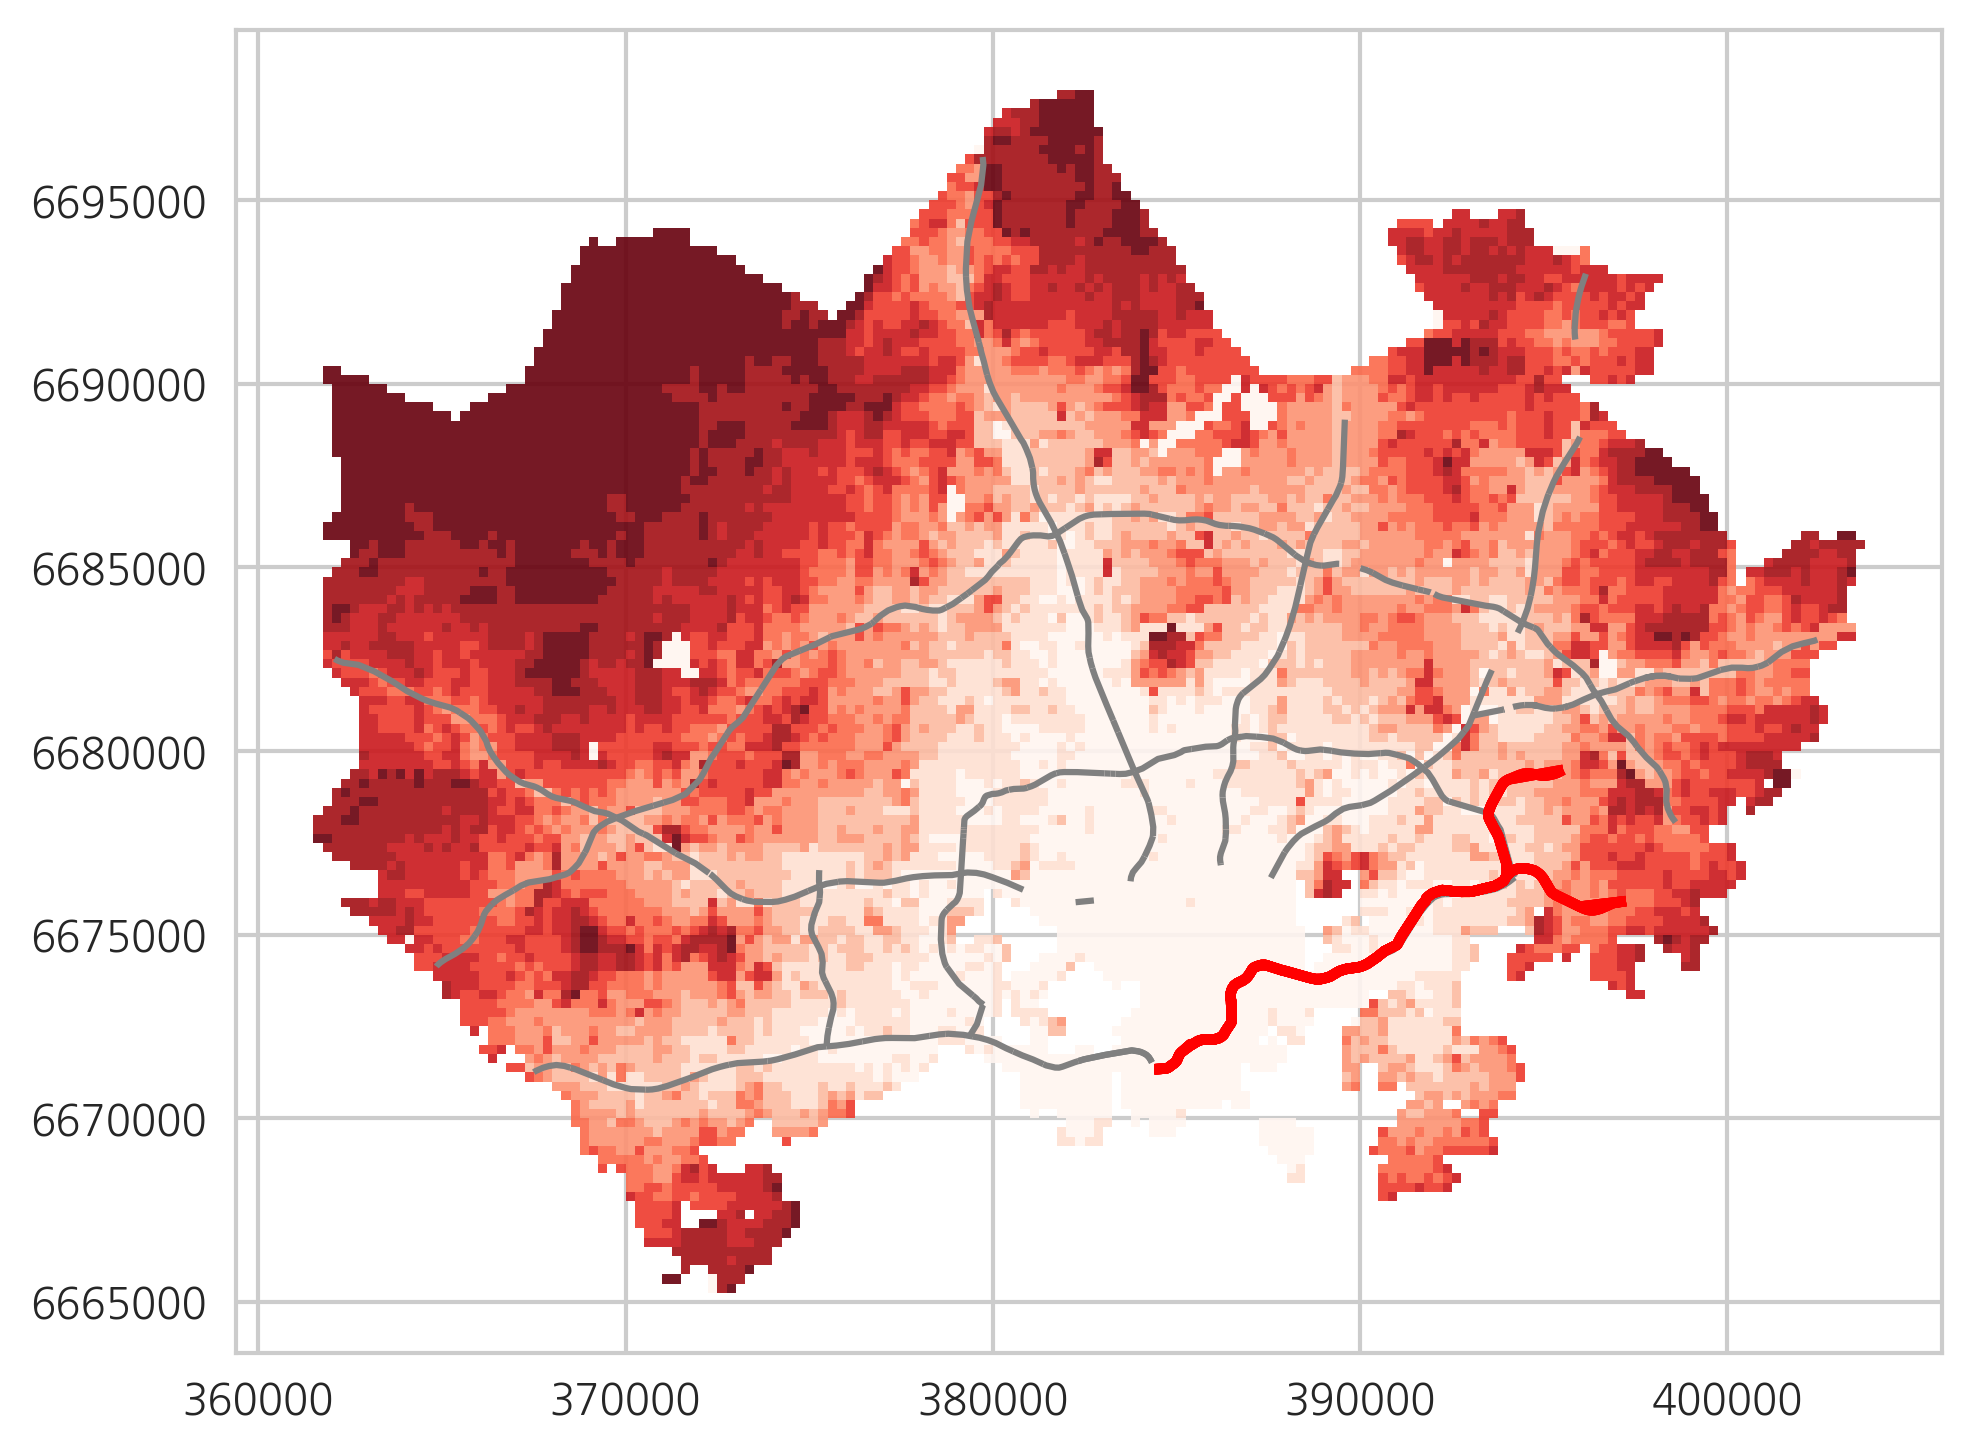

In [157]:
my_map = grid.plot(column="car_r_t", linewidth=0.03, cmap="Reds", scheme="quantiles", k=9, alpha=0.9)
roads.plot(ax=my_map, color="grey", linewidth=1.5)
metro.plot(ax=my_map, color="red", linewidth=2.5)
plt.tight_layout()
outfp = r'./shapely/dataE5/dataE5/static_map.png'
plt.savefig(outfp, dpi=300)

In [166]:
roads['geometry']

0      LINESTRING (393902.4363970492 6681130.13311762...
1      LINESTRING (398159.608959613 6679454.908297231...
2      LINESTRING (396439.8357809301 6681548.78722944...
3      LINESTRING (395179.6706548687 6682842.47338640...
4      LINESTRING (394423.6116062522 6683498.13173338...
5      LINESTRING (391921.2611702786 6684321.38411625...
6      LINESTRING (391576.3176501537 6684406.82608608...
7      LINESTRING (390346.8788273776 6684854.7893704,...
8      LINESTRING (388961.7779090909 6685051.45986294...
9      LINESTRING (388221.1400957089 6685354.82934531...
10     LINESTRING (386418.657518515 6686133.861802643...
11     LINESTRING (382948.595613564 6686447.41053412,...
12     LINESTRING (381735.278474925 6685917.882183491...
13     LINESTRING (379428.0947324475 6684380.38282301...
14     LINESTRING (379144.6758756311 6684171.13410409...
15     LINESTRING (376692.6963227279 6683465.62130236...
16     LINESTRING (376766.7996474223 6683532.0279644,...
17     LINESTRING (373680.91372

## Interactive maps with Bokeh

In [167]:
from bokeh.plotting import figure, save

In [168]:
p = figure(title="My first interactive plot!!")
p

Figure(id='849f841a-5ba3-40b5-acac-de5a5d5caa2d', ...)

In [169]:
x_coords = [0, 1, 2, 3, 4]
y_coords = [5, 4, 1, 2, 0]

In [170]:
p.circle(x=x_coords, y=y_coords, size=10, color="red")

GlyphRenderer(id='4c18ca2b-9ec5-4ae1-8114-0cafbe04935f', ...)

In [171]:
outfp = r'./shapely/dataE5/dataE5/points.html'
save(obj=p, filename=outfp)

/home/dockeruser/anaconda3/lib/python3.6/site-packages/bokeh/io.py:419: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warnings.warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/home/dockeruser/anaconda3/lib/python3.6/site-packages/bokeh/io.py:429: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warnings.warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/home/dockeruser/hostname/workspace/git/kaden/individual_project_20171130/shapely/dataE5/dataE5/points.html'

1. Read the Shapefile into GeoDataFrame
2. Calculate the x and y coordinates of the geometries into separate columns
3. Convert the GeoDataFrame into a Bokeh DataSource
4. Plot the x and y coordinates as points, lines or polygons (which are in Bokeh words: circle, multi_line and patches)

### Point map

In [ ]:
import geopandas as gpd

# File path
points_fp = r"/home/geo/data/addresses.shp"

# Read the data
points = gpd.read_file(points_fp)

In [ ]:
points.head()

In [ ]:
def getPointCoords(row, geom, coord_type):
    """Calculates coordinates ('x' or 'y') of a Point geometry"""
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y

In [ ]:
# Calculate x coordinates
In [7]: points['x'] = points.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)

# Calculate y coordinates
In [8]: points['y'] = points.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

- DataFrame to ColumnDataSource http://bokeh.pydata.org/en/latest/docs/reference/models/sources.html#bokeh.models.sources.ColumnDataSource

In [ ]:
p_df = points.drop('geometry', axis=1).copy()
p_df.head(2)

In [ ]:
Out[11]: 
                                 address    id          x          y
0  Kampinkuja 1, 00100 Helsinki, Finland  1001  24.930170  60.168373
1   Kaivokatu 8, 00101 Helsinki, Finland  1002  24.941893  60.169866

In [ ]:
# Initialize our plot figure
In [15]: p = figure(title="A map of address points from a Shapefile")

# Add the points to the map from our 'psource' ColumnDataSource -object
In [16]: p.circle('x', 'y', source=psource, color='red', size=10)
Out[16]: GlyphRenderer(id='dbfd3980-35c0-4ca6-a4f9-c497d6993d8e', ...)

## Adding interactivity to the map
- Hover Tool : http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#hovertool

In [173]:
from bokeh.models import HoverTool
my_hover = HoverTool()

In [ ]:
my_hover.tooltips = [('Address of the point', '@address')]
p.add_tools(my_hover)
outfp = r"/home/geo/data/point_map_hover.html"

save(p, outfp)

- As you can see now the plot shows information about the points and the content is the information derived from column address.

## Line Map

In [ ]:
metro_fp = 